# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l2_active/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l3/1963075870_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1393828949_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/204805934_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/204322447_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1164365897_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1278002745_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1963075870_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
2:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
3:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
4:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
6:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
7:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
8:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
9:[(AccessPerm, denied), (HostObs, none), (ActionRe

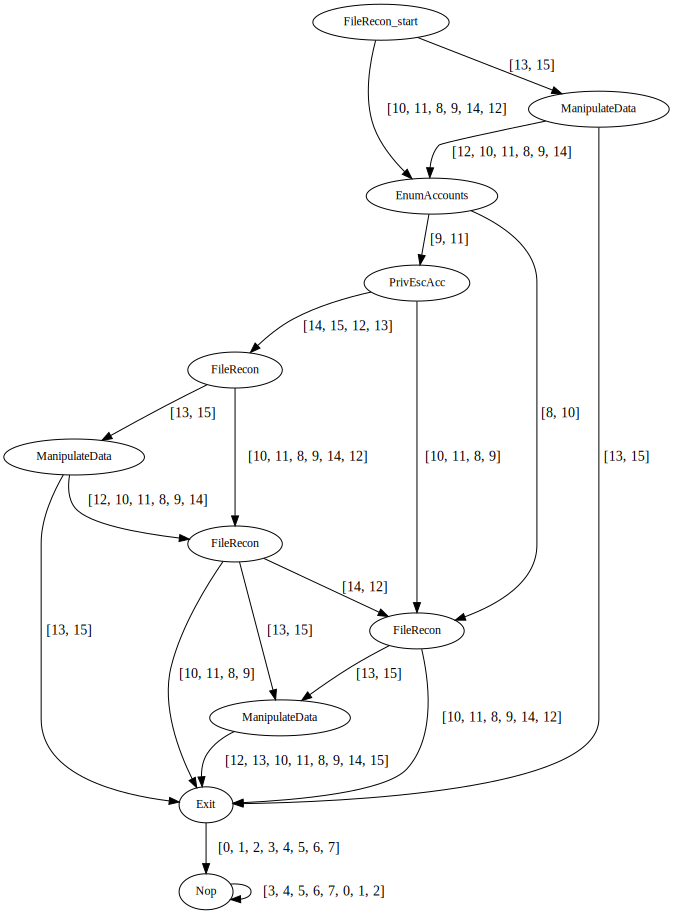

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1393828949_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
8:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
9:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnS

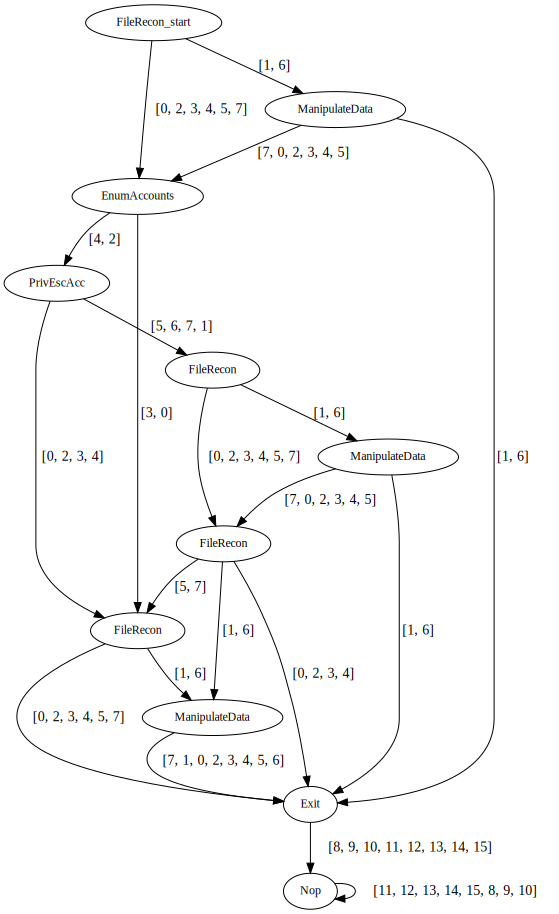

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/204805934_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


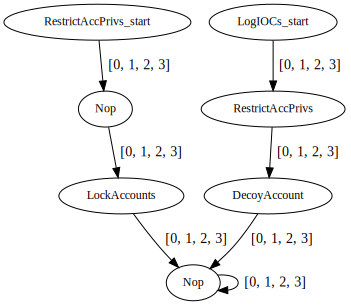

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/204322447_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


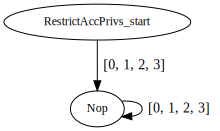

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1164365897_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
2:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
4:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
5:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
6:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
7:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated), 

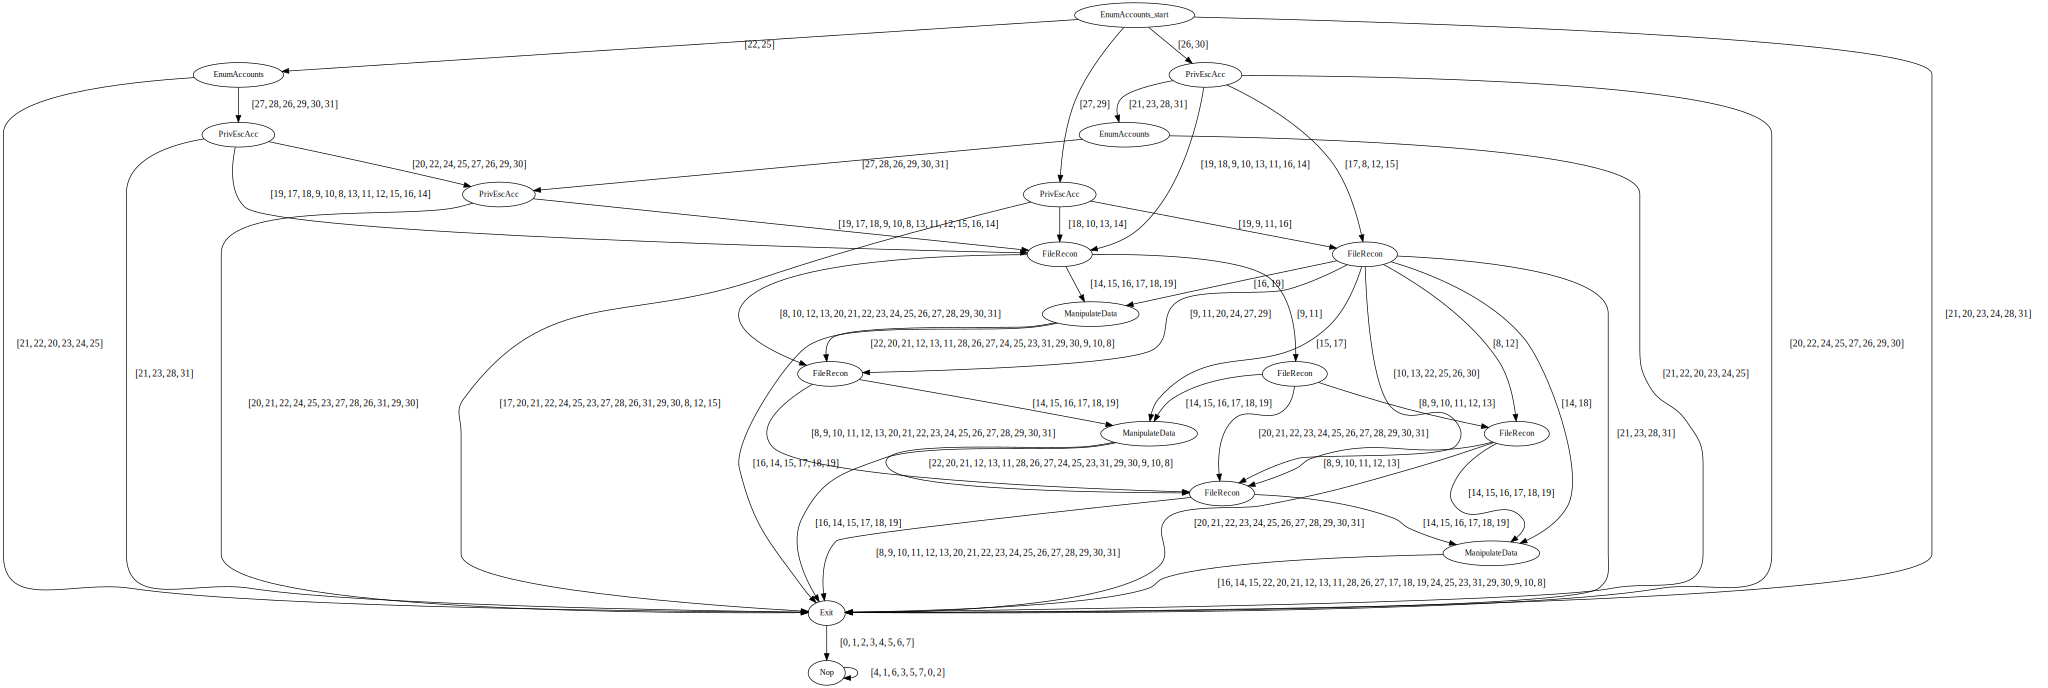

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1278002745_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


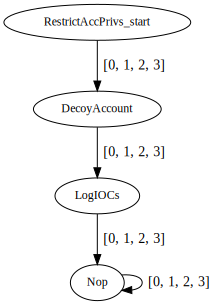

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                   login_activity

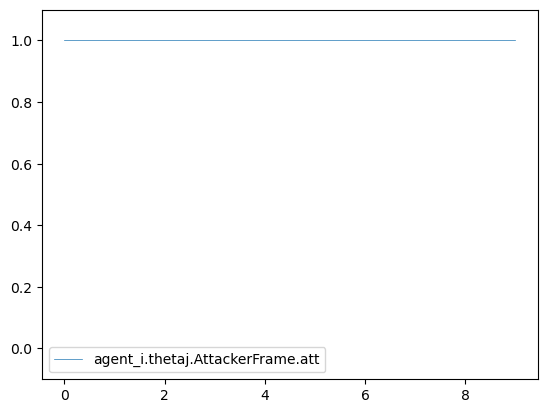

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.001541                        0.998459   
4                         0.001541                        0.998459   
5                         0.001541                        0.998459   
6                         0.001541                        0.998459   
7                         0.001541                        0.998459   
8                         0.001541                        0.998459   
9                         0.001541                        0.998459   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                            auth                         none   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           success                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

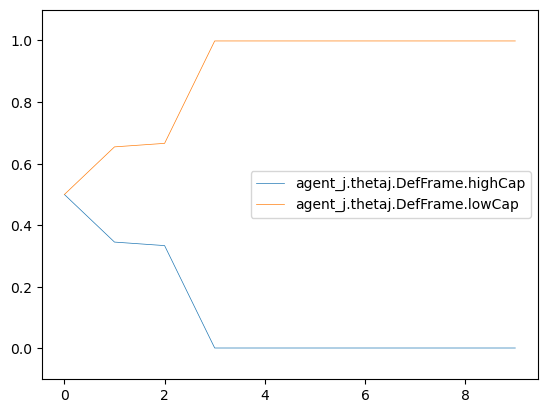

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0  RestrictAccPrivs    EnumAccounts
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0           LogIOCs      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

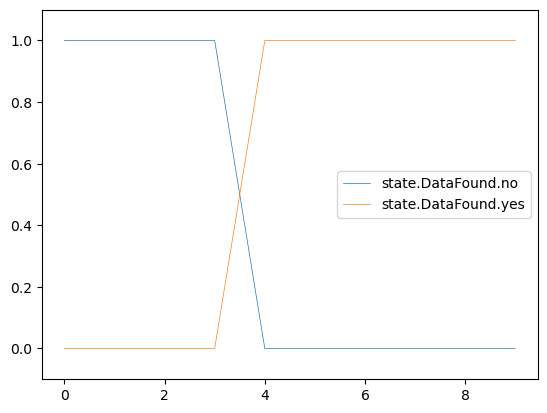

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.312986               0.687014               Nop   
5              0.042790               0.957210               Nop   
6              0.006070               0.993930               Nop   
7              0.004974               0.995026               Nop   
8              0.004966               0.995034               Nop   
9              0.004966               0.995034               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

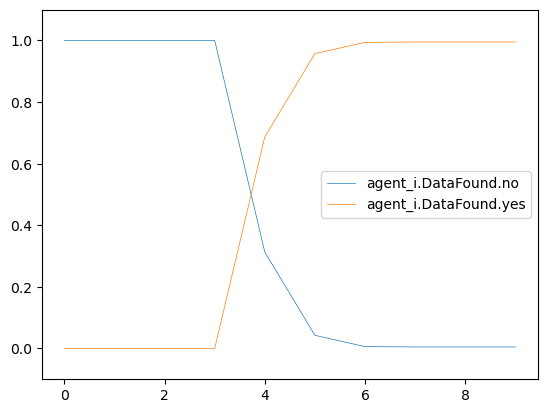

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000    EnumAccounts   
2              1.000000               0.000000      PrivEscAcc   
3              1.000000               0.000000       FileRecon   
4              0.093525               0.906475  ManipulateData   
5              0.000052               0.999948            Exit   
6              0.000052               0.999948             Nop   
7              0.000052               0.999948             Nop   
8              0.000052               0.999948             Nop   
9              0.000052               0.999948             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

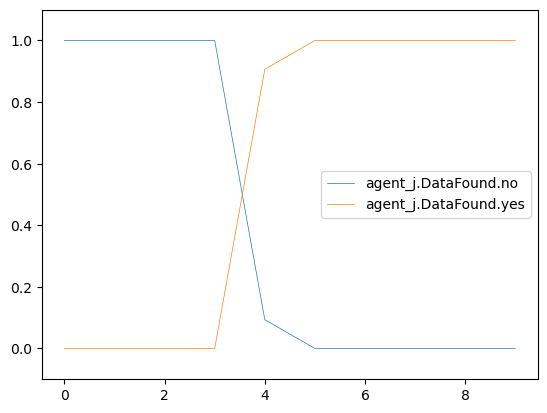

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

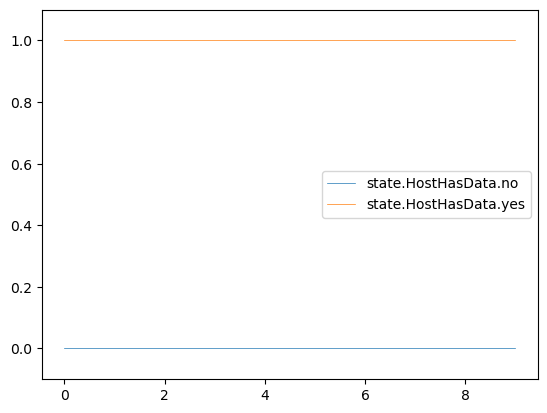

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

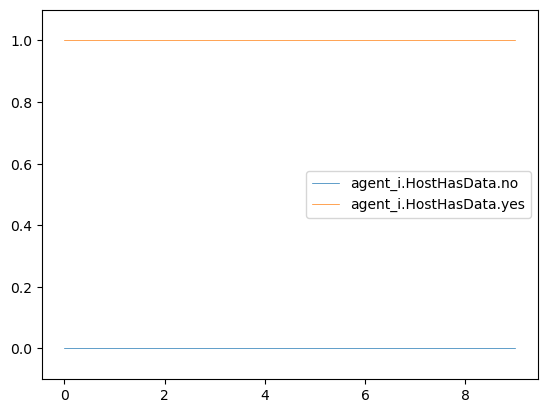

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000    EnumAccounts   
2                0.500000                 0.500000      PrivEscAcc   
3                0.500000                 0.500000       FileRecon   
4                0.071942                 0.928057  ManipulateData   
5                0.000040                 0.999960            Exit   
6                0.000040                 0.999960             Nop   
7                0.000040                 0.999960             Nop   
8                0.000040                 0.999960             Nop   
9                0.000040                 0.999960             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

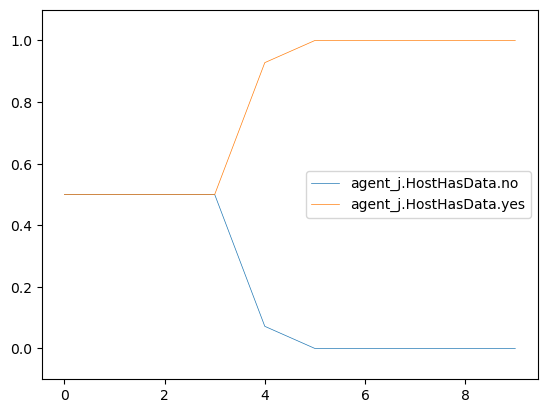

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

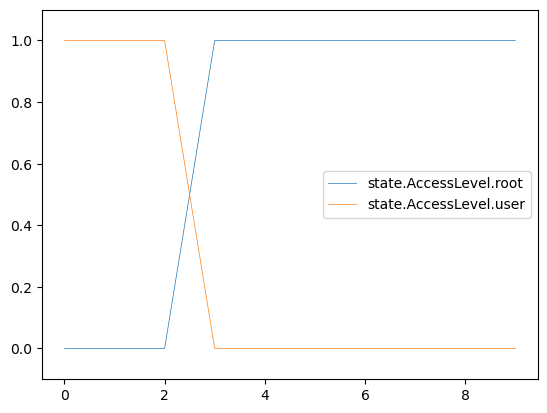

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.883146                  0.116854               Nop   
4                  0.981735                  0.018265               Nop   
5                  0.996193                  0.003807               Nop   
6                  0.995856                  0.004144               Nop   
7                  0.995834                  0.004166               Nop   
8                  0.995833                  0.004167               Nop   
9                  0.995834                  0.004167               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

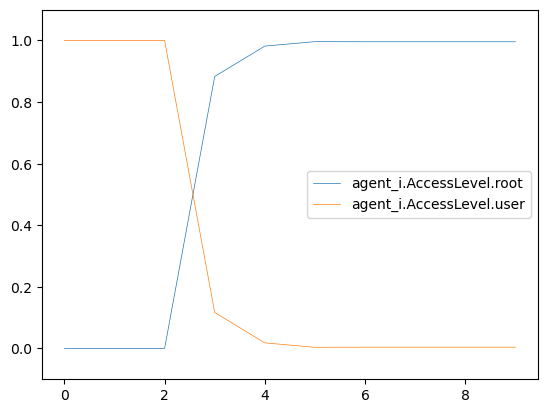

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0    EnumAccounts   
1                       0.0                       1.0    EnumAccounts   
2                       0.0                       1.0      PrivEscAcc   
3                       1.0                       0.0       FileRecon   
4                       1.0                       0.0  ManipulateData   
5                       1.0                       0.0            Exit   
6                       1.0                       0.0             Nop   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

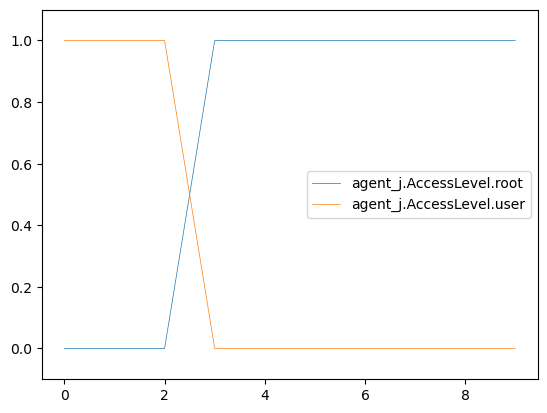

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action  agent_j.action
0                  1.0                   0.0  RestrictAccPrivs    EnumAccounts
1                  1.0                   0.0      DecoyAccount    EnumAccounts
2                  1.0                   0.0           LogIOCs      PrivEscAcc
3                  0.0                   1.0               Nop       FileRecon
4                  0.0                   1.0               Nop  ManipulateData
5                  0.0                   1.0               Nop            Exit
6                  0.0                   1.0               Nop             Nop
7                  0.0                   1.0               Nop             Nop
8                  0.0                   1.0               Nop             Nop
9                  0.0                   1.0               Nop             Nop

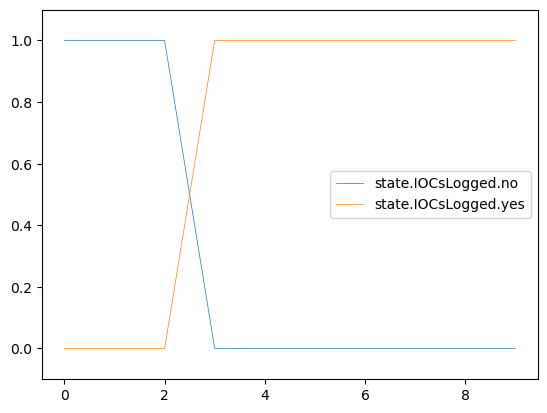

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

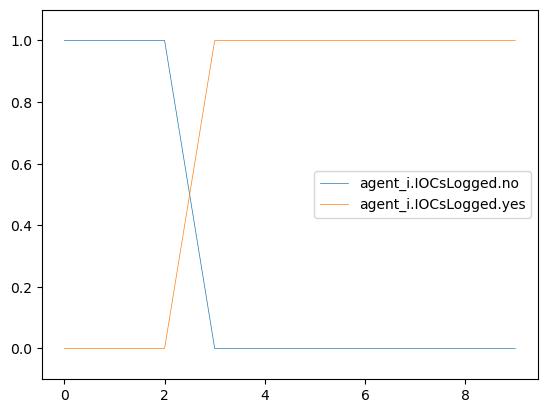

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0               1.000000                0.000000    EnumAccounts   
1               0.981818                0.018182    EnumAccounts   
2               0.998972                0.001028      PrivEscAcc   
3               0.998459                0.001541       FileRecon   
4               0.998459                0.001541  ManipulateData   
5               0.998459                0.001541            Exit   
6               0.998459                0.001541             Nop   
7               0.998459                0.001541             Nop   
8               0.998459                0.001541             Nop   
9               0.998459                0.001541             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

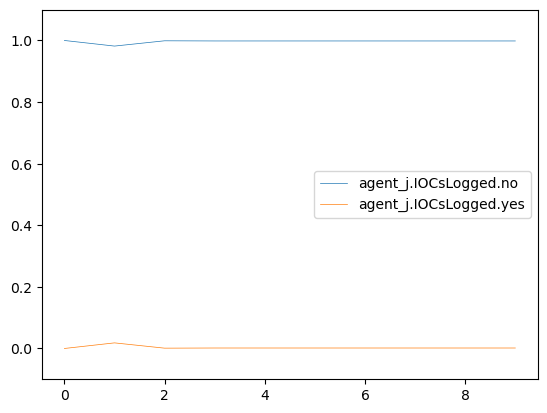

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

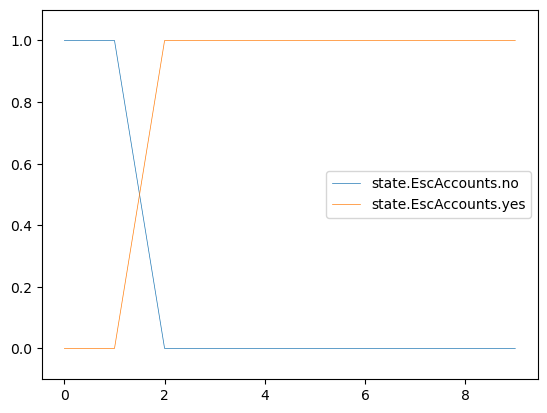

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

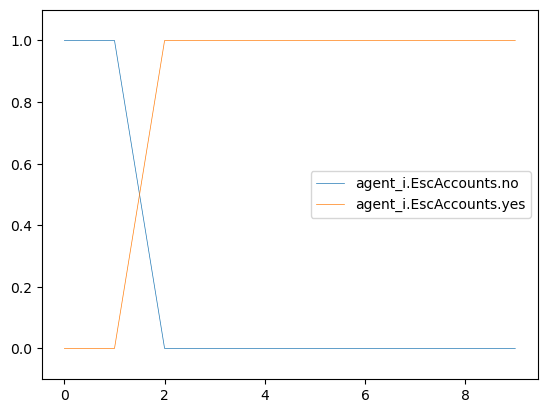

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.725806                 0.274194    EnumAccounts   
2                0.271739                 0.728261      PrivEscAcc   
3                0.000000                 1.000000       FileRecon   
4                0.000000                 1.000000  ManipulateData   
5                0.000000                 1.000000            Exit   
6                0.000000                 1.000000             Nop   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

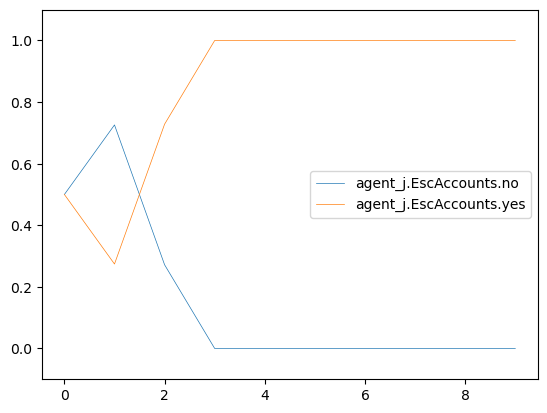

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

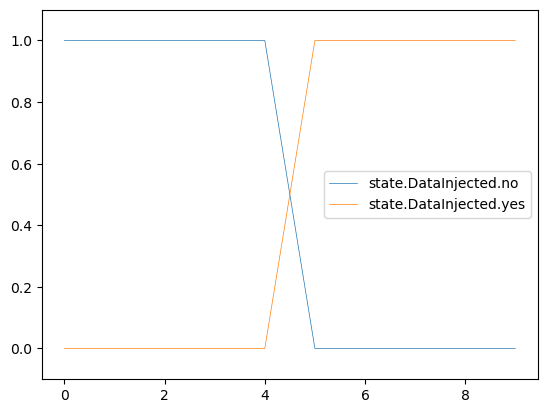

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.097957                  0.902043               Nop   
6                 0.011075                  0.988925               Nop   
7                 0.005381                  0.994619               Nop   
8                 0.005244                  0.994756               Nop   
9                 0.005244                  0.994757               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

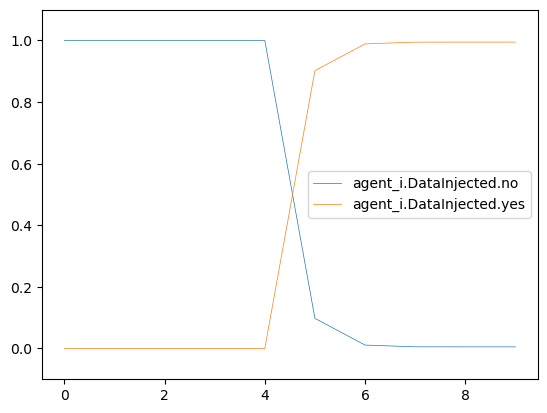

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000052                  0.999948            Exit   
6                 0.000052                  0.999948             Nop   
7                 0.000052                  0.999948             Nop   
8                 0.000052                  0.999948             Nop   
9                 0.000052                  0.999948             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

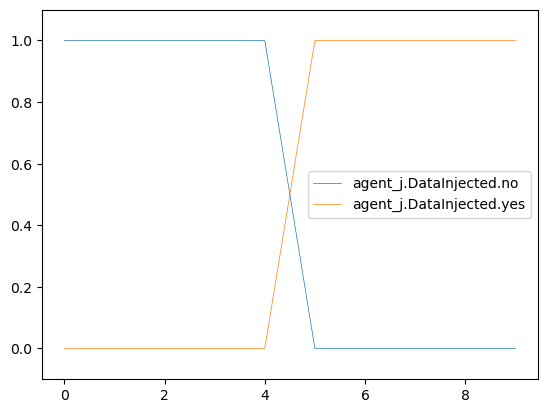

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0  RestrictAccPrivs    EnumAccounts  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0           LogIOCs      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

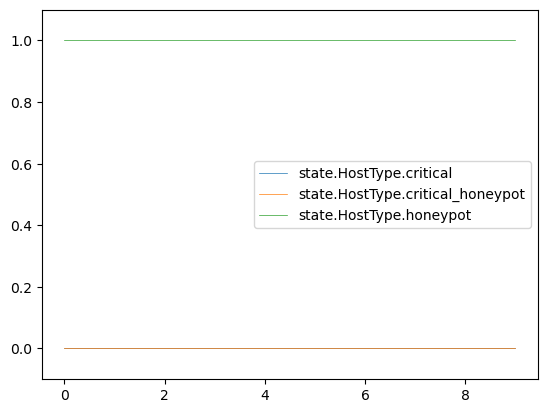

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0  RestrictAccPrivs    EnumAccounts   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0           LogIOCs      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

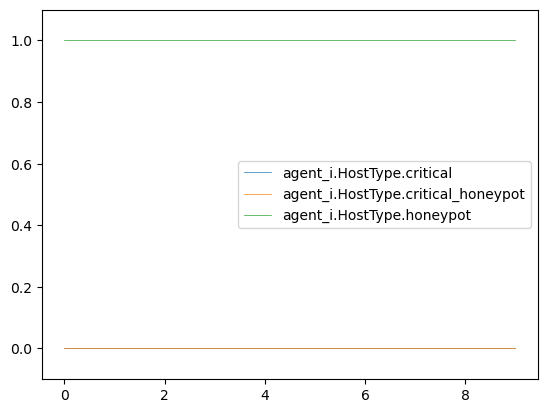

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts  RestrictAccPrivs   
1                        0.0    EnumAccounts      DecoyAccount   
2                        0.0      PrivEscAcc           LogIOCs   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                            auth                         none   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           success                          active   
4                           success                          active   
5                           success                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

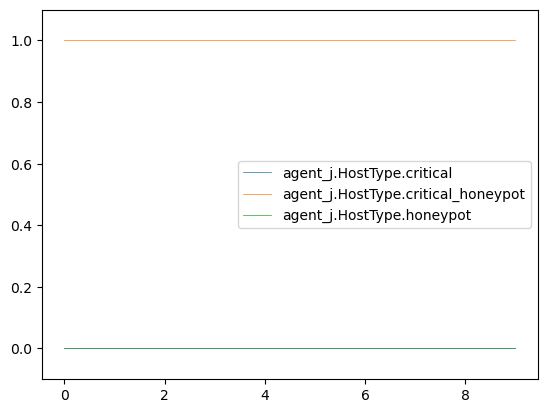

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0  RestrictAccPrivs    EnumAccounts
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0           LogIOCs      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

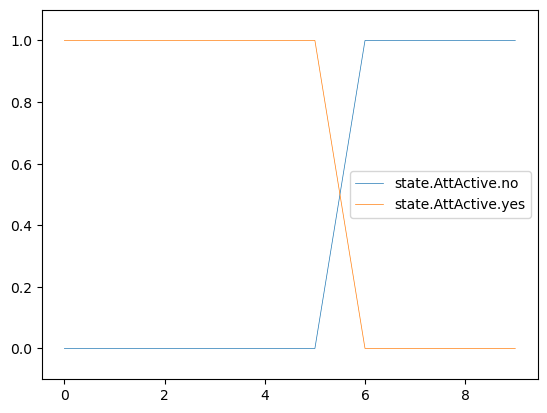

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000           1.000000e+00  RestrictAccPrivs   
1              0.000000           1.000000e+00      DecoyAccount   
2              0.016212           9.837884e-01           LogIOCs   
3              0.071938           9.280618e-01               Nop   
4              0.017584           9.824159e-01               Nop   
5              0.003807           9.961933e-01               Nop   
6              0.985218           1.478154e-02               Nop   
7              0.999128           8.720832e-04               Nop   
8              0.999980           2.033667e-05               Nop   
9              1.000000           1.007061e-07               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

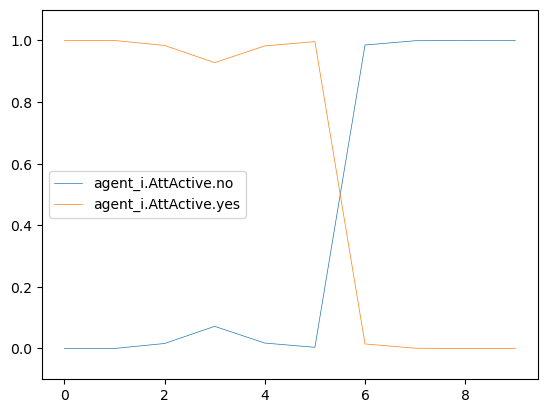

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

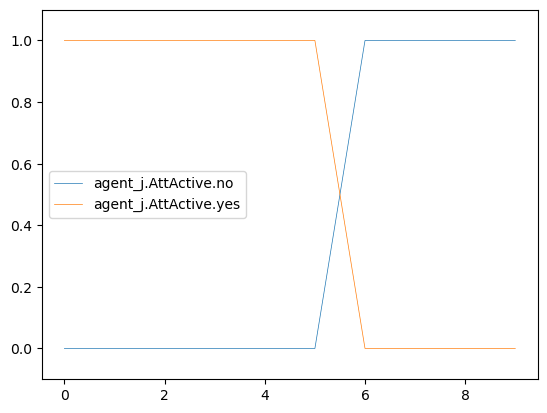

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0  RestrictAccPrivs   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0           LogIOCs   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

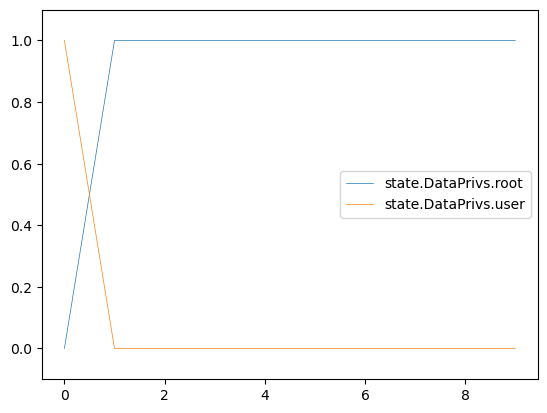

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

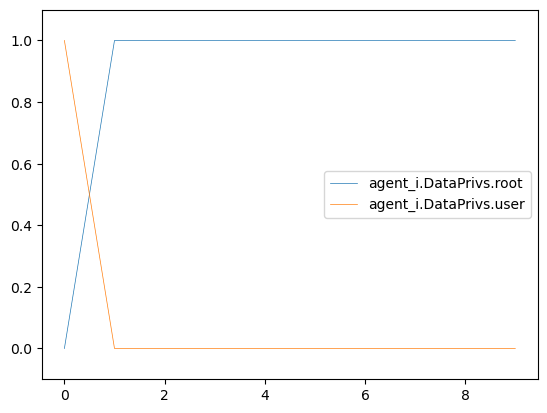

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.990909                0.009091    EnumAccounts   
2                1.000000                0.000000      PrivEscAcc   
3                1.000000                0.000000       FileRecon   
4                1.000000                0.000000  ManipulateData   
5                1.000000                0.000000            Exit   
6                1.000000                0.000000             Nop   
7                1.000000                0.000000             Nop   
8                1.000000                0.000000             Nop   
9                1.000000                0.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

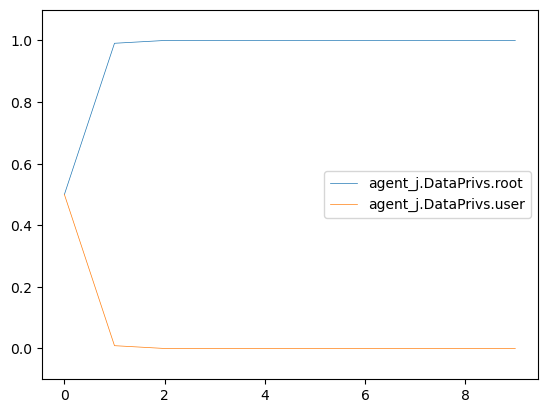

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0  RestrictAccPrivs    EnumAccounts
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0           LogIOCs      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

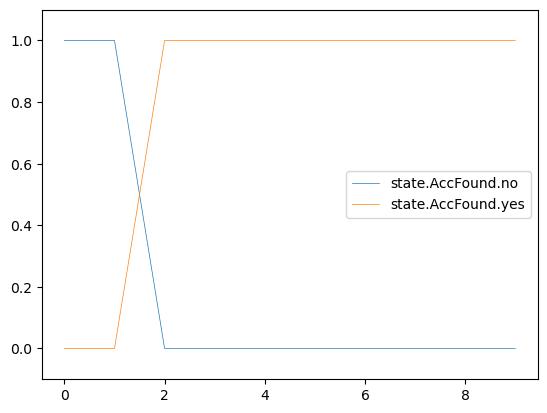

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000  RestrictAccPrivs   
1             1.000000              0.000000      DecoyAccount   
2             0.322696              0.677304           LogIOCs   
3             0.100833              0.899167               Nop   
4             0.016008              0.983992               Nop   
5             0.003336              0.996664               Nop   
6             0.003632              0.996368               Nop   
7             0.003651              0.996349               Nop   
8             0.003652              0.996348               Nop   
9             0.003652              0.996348               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

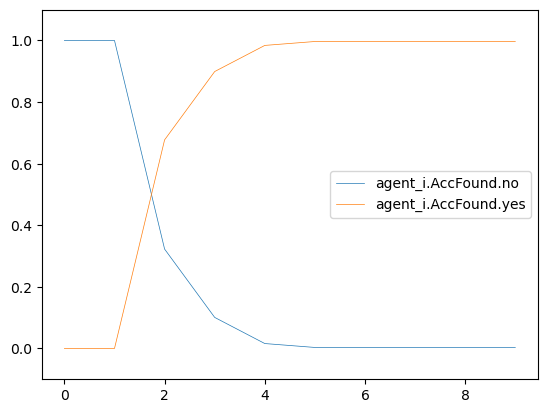

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.943548              0.056452    EnumAccounts   
2             0.296196              0.703804      PrivEscAcc   
3             0.000000              1.000000       FileRecon   
4             0.000000              1.000000  ManipulateData   
5             0.000000              1.000000            Exit   
6             0.000000              1.000000             Nop   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

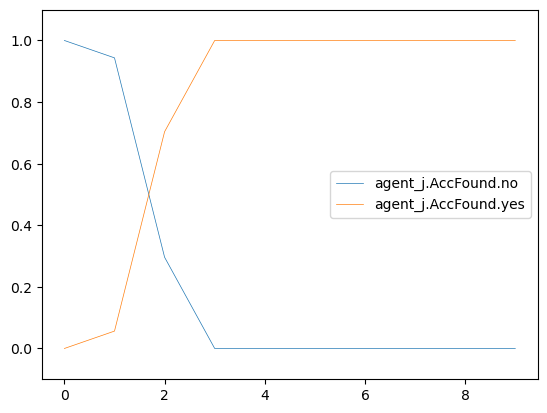

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                             none
4                               1.0                             none
5                               1.0                       file_write
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                       file_write

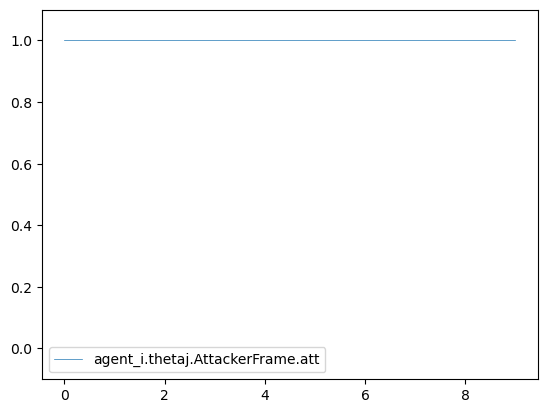

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.087029                        0.912971   
4                         0.087029                        0.912971   
5                         0.087029                        0.912971   
6                         0.087029                        0.912971   
7                         0.087029                        0.912971   
8                         0.087029                        0.912971   
9                         0.087029                        0.912971   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                          denied                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

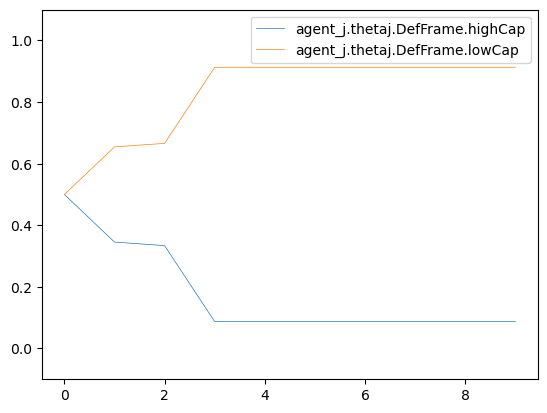

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount   EnumAccounts
2                 1.0                  0.0           LogIOCs     PrivEscAcc
3                 1.0                  0.0               Nop           Exit
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

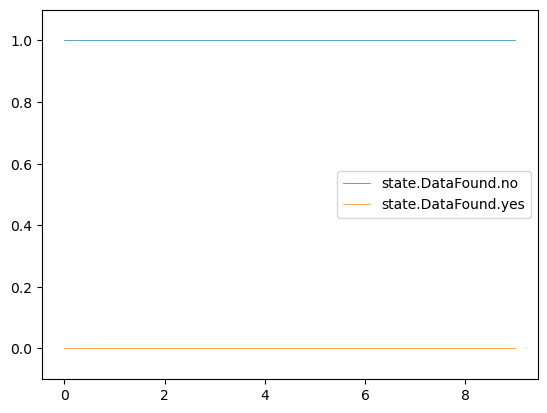

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.628609               0.371391               Nop   
5              0.874547               0.125453               Nop   
6              0.719535               0.280465               Nop   
7              0.676810               0.323189               Nop   
8              0.678285               0.321715               Nop   
9              0.678285               0.321715               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

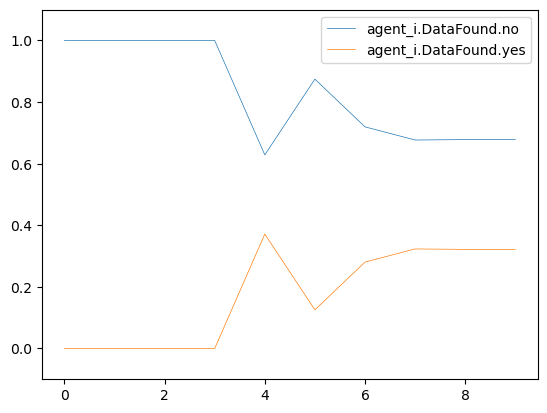

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0   EnumAccounts   
2                   1.0                    0.0     PrivEscAcc   
3                   1.0                    0.0           Exit   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

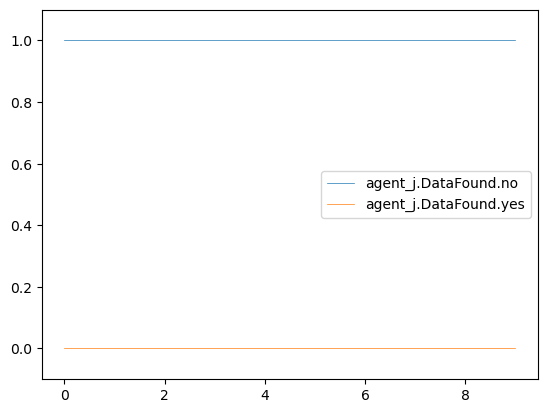

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

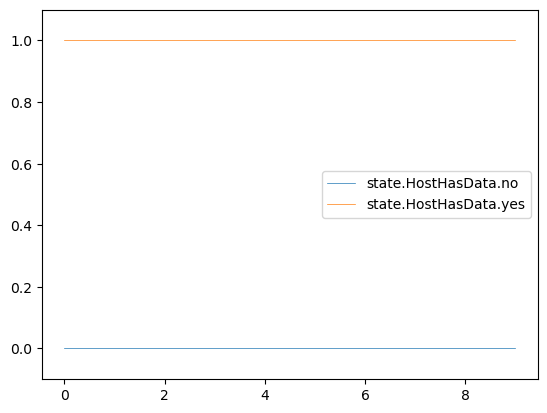

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

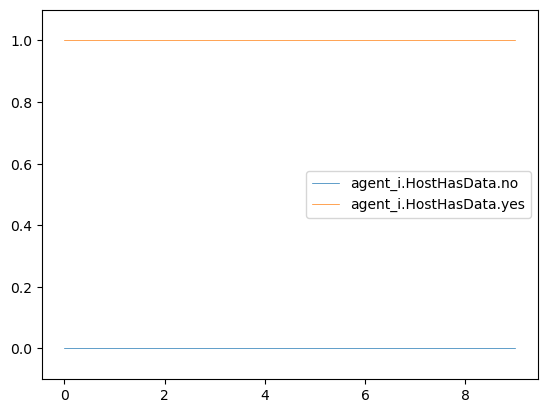

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5   EnumAccounts   
2                     0.5                      0.5     PrivEscAcc   
3                     0.5                      0.5           Exit   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

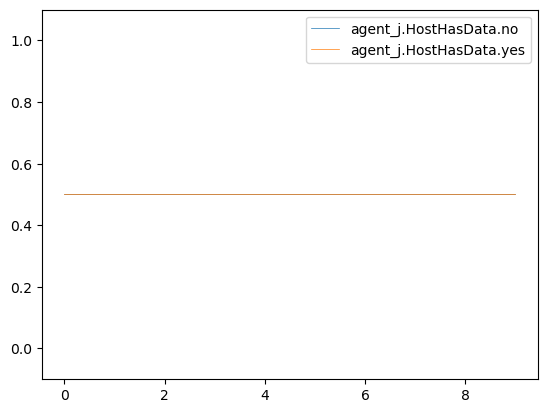

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0               Nop   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

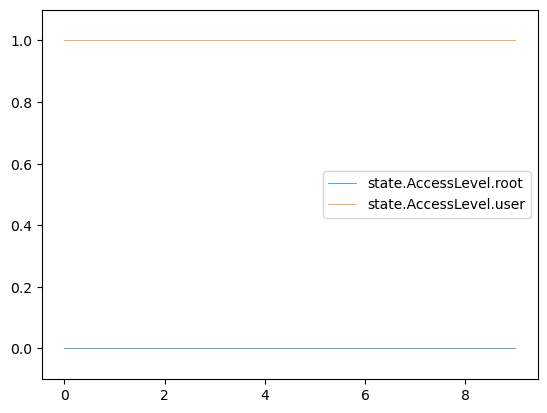

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.883146                  0.116854               Nop   
4                  0.531641                  0.468359               Nop   
5                  0.139533                  0.860467               Nop   
6                  0.287291                  0.712708               Nop   
7                  0.327933                  0.672067               Nop   
8                  0.326245                  0.673755               Nop   
9                  0.326246                  0.673754               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

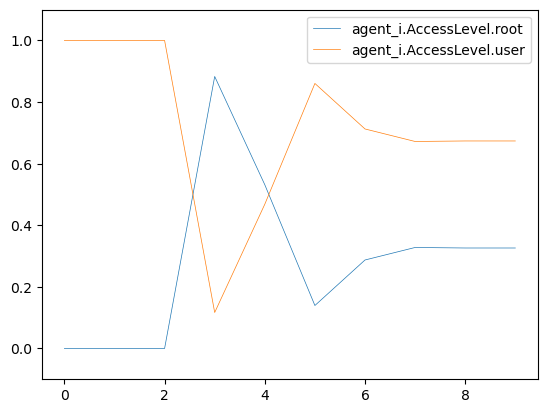

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0     PrivEscAcc   
3                       0.0                       1.0           Exit   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

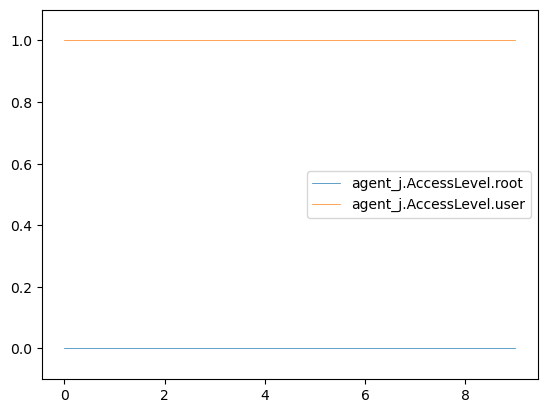

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount   EnumAccounts
2                  1.0                   0.0           LogIOCs     PrivEscAcc
3                  0.0                   1.0               Nop           Exit
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

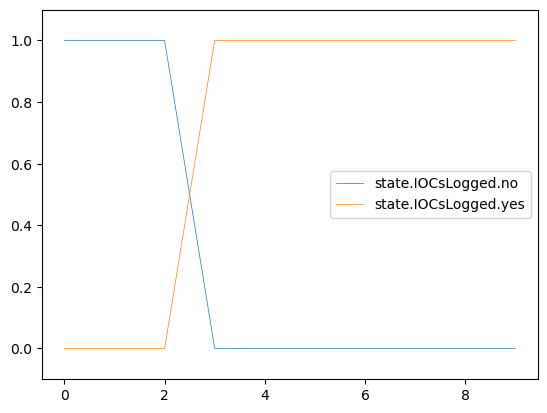

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

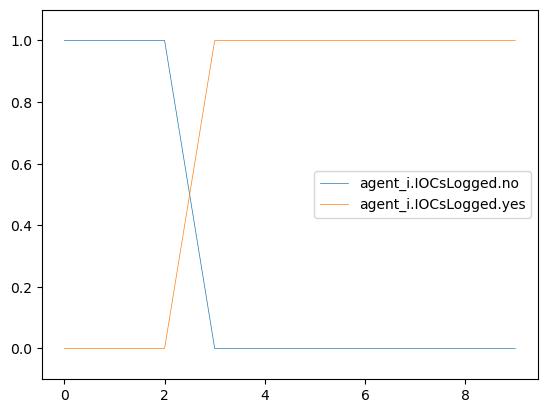

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.981818                0.018182   EnumAccounts   
2               0.998972                0.001028     PrivEscAcc   
3               0.998591                0.001409           Exit   
4               0.998591                0.001409            Nop   
5               0.998591                0.001409            Nop   
6               0.998591                0.001409            Nop   
7               0.998591                0.001409            Nop   
8               0.998591                0.001409            Nop   
9               0.998591                0.001409            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

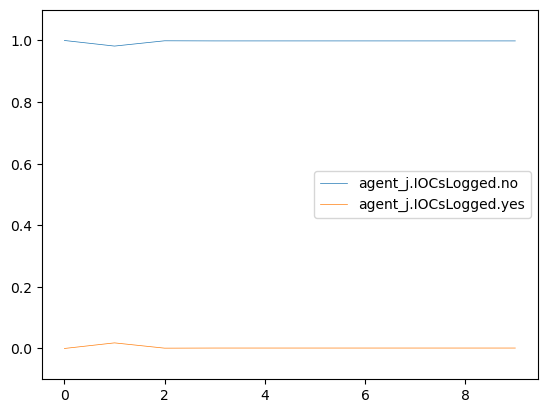

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

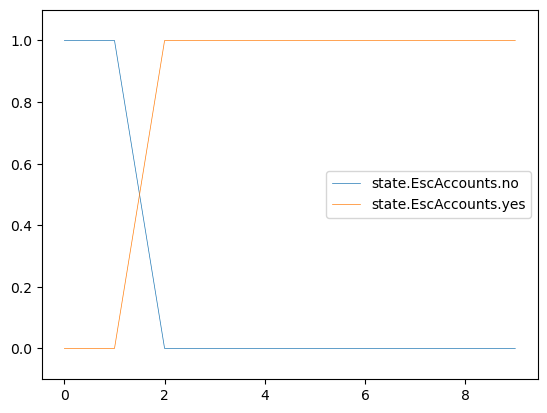

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

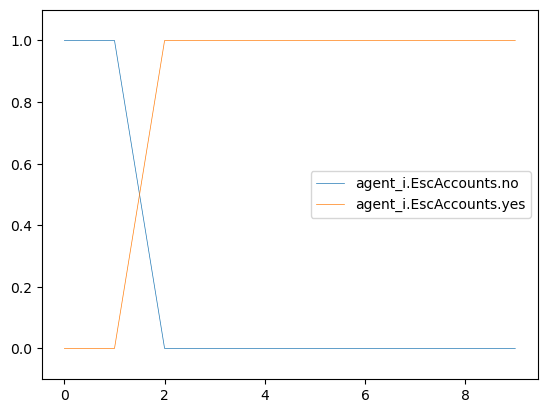

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194   EnumAccounts   
2                0.271739                 0.728261     PrivEscAcc   
3                0.860854                 0.139146           Exit   
4                0.860854                 0.139146            Nop   
5                0.860854                 0.139146            Nop   
6                0.860854                 0.139146            Nop   
7                0.860854                 0.139146            Nop   
8                0.860854                 0.139146            Nop   
9                0.860854                 0.139146            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

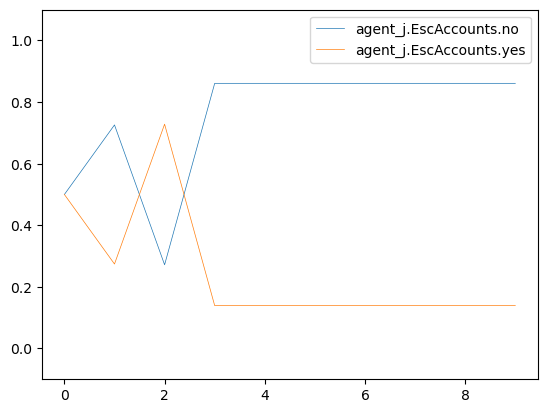

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

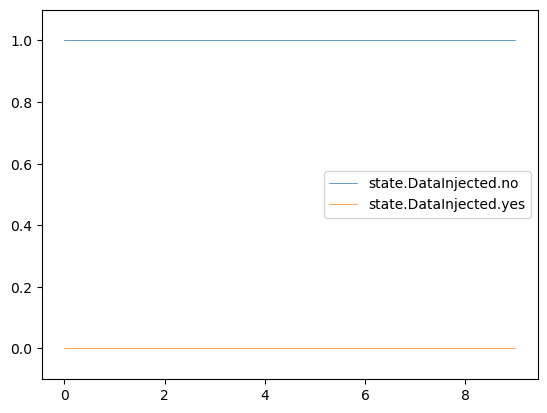

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.912273                  0.087727               Nop   
6                 0.730475                  0.269525               Nop   
7                 0.680483                  0.319517               Nop   
8                 0.679478                  0.320522               Nop   
9                 0.679462                  0.320539               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

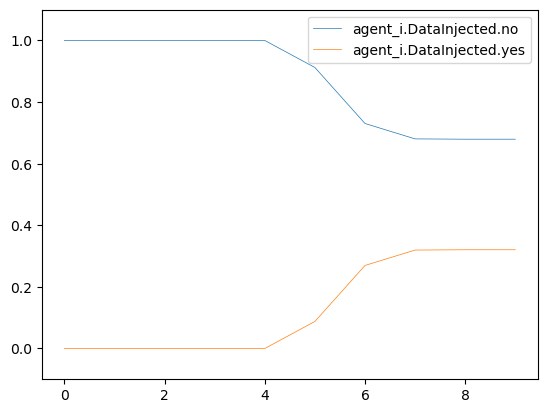

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0           Exit   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

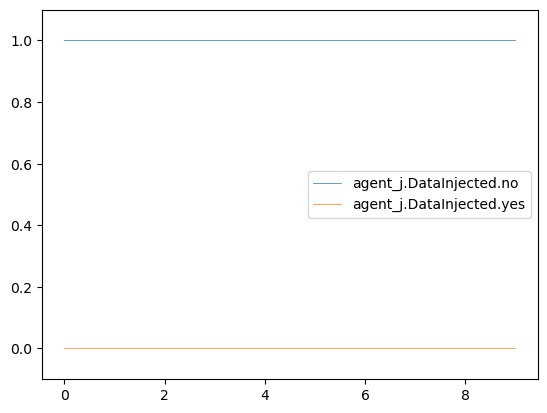

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount   EnumAccounts  
2                      1.0           LogIOCs     PrivEscAcc  
3                      1.0               Nop           Exit  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

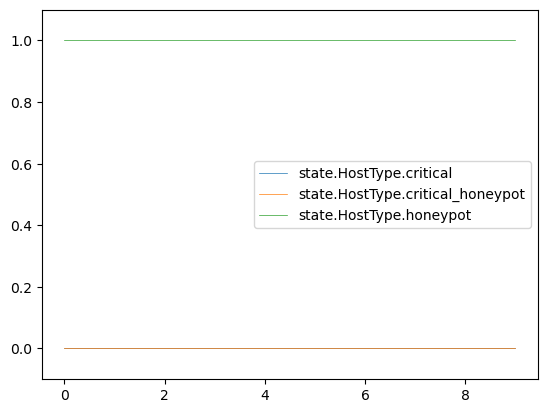

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount   EnumAccounts   
2                        1.0           LogIOCs     PrivEscAcc   
3                        1.0               Nop           Exit   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                             none  
4                             none  
5                       file_write  
6                       file_write  
7                             none  
8                        file_enum  
9                       file_write

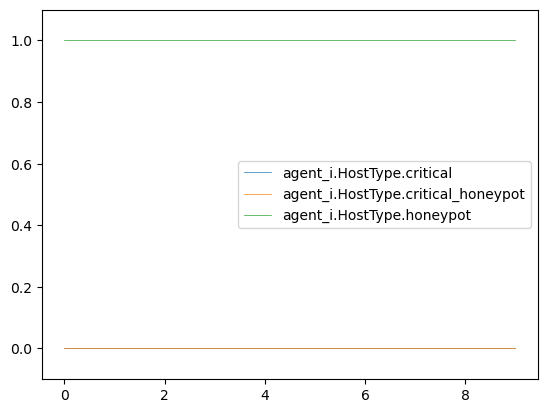

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0   EnumAccounts  RestrictAccPrivs   
1                        0.0   EnumAccounts      DecoyAccount   
2                        0.0     PrivEscAcc           LogIOCs   
3                        0.0           Exit               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                          denied                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

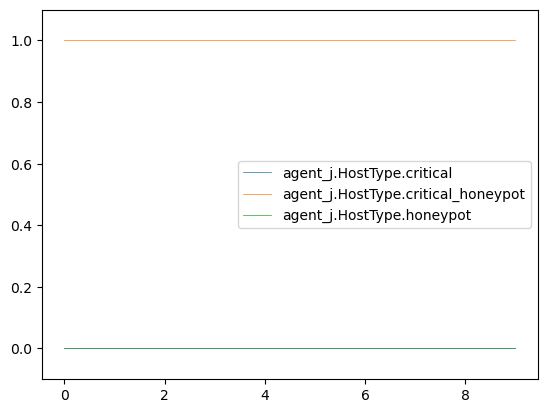

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount   EnumAccounts
2                 0.0                  1.0           LogIOCs     PrivEscAcc
3                 0.0                  1.0               Nop           Exit
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

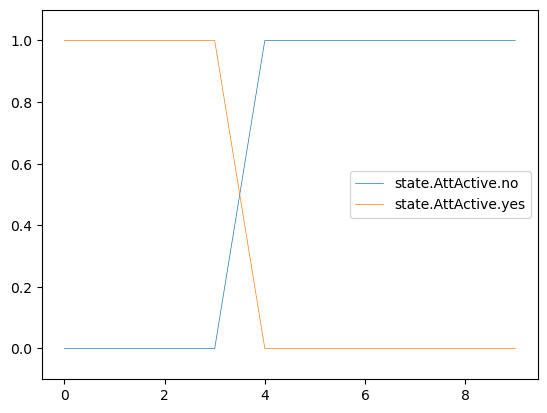

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000  RestrictAccPrivs   
1              0.000000               1.000000      DecoyAccount   
2              0.016212               0.983788           LogIOCs   
3              0.071938               0.928062               Nop   
4              0.465781               0.534219               Nop   
5              0.860467               0.139533               Nop   
6              0.785299               0.214701               Nop   
7              0.929370               0.070630               Nop   
8              0.999581               0.000419               Nop   
9              0.999981               0.000019               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

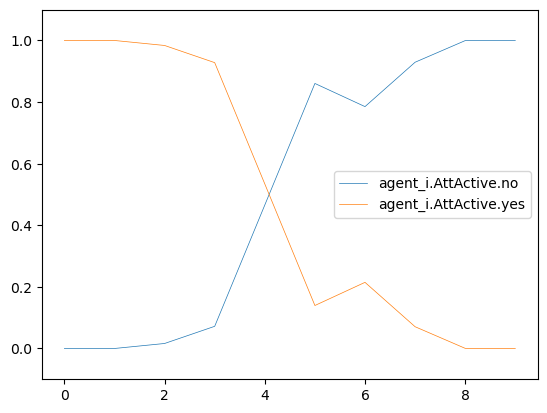

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0     PrivEscAcc   
3                   0.0                    1.0           Exit   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

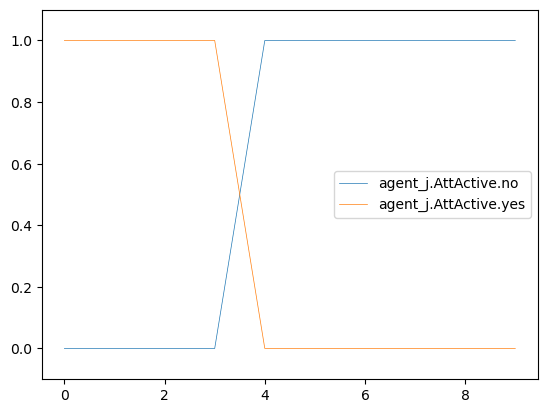

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount   EnumAccounts
2                   1.0                   0.0           LogIOCs     PrivEscAcc
3                   1.0                   0.0               Nop           Exit
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

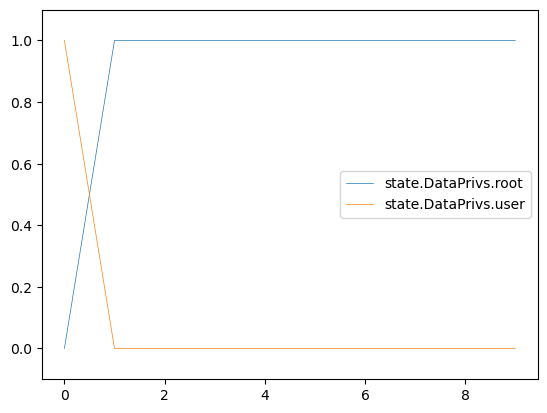

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

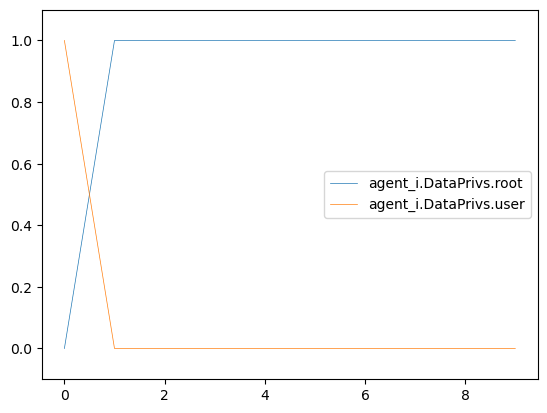

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.990909                0.009091   EnumAccounts   
2                1.000000                0.000000     PrivEscAcc   
3                1.000000                0.000000           Exit   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

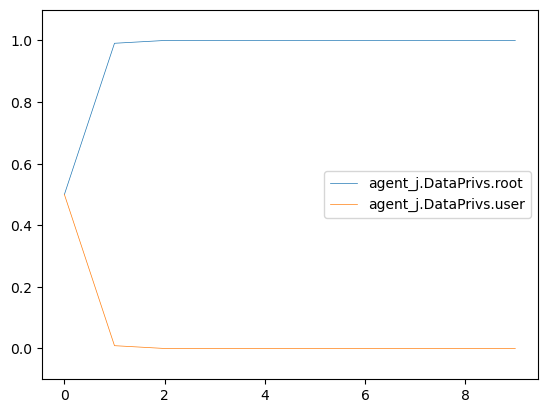

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount   EnumAccounts
2                1.0                 0.0           LogIOCs     PrivEscAcc
3                1.0                 0.0               Nop           Exit
4                1.0                 0.0               Nop            Nop
5                1.0                 0.0               Nop            Nop
6                1.0                 0.0               Nop            Nop
7                1.0                 0.0               Nop            Nop
8                1.0                 0.0               Nop            Nop
9                1.0                 0.0               Nop            Nop

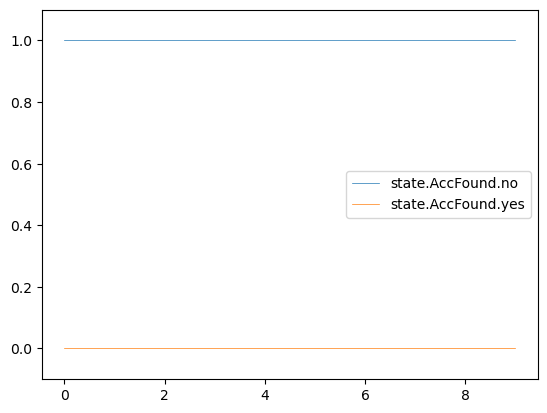

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount   EnumAccounts   
2             0.322696              0.677304           LogIOCs     PrivEscAcc   
3             0.100833              0.899167               Nop           Exit   
4             0.408566              0.591434               Nop            Nop   
5             0.750616              0.249384               Nop            Nop   
6             0.621720              0.378280               Nop            Nop   
7             0.586267              0.413733               Nop            Nop   
8             0.587740              0.412260               Nop            Nop   
9             0.587739              0.412260               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                             none  
4                             none  
5                       file_write  
6                       file_write  
7                             none  
8                        file_enum  
9                       file_write

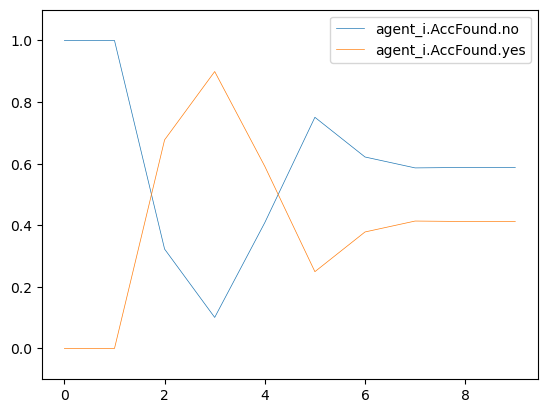

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452   EnumAccounts      DecoyAccount   
2             0.296196              0.703804     PrivEscAcc           LogIOCs   
3             0.939740              0.060260           Exit               Nop   
4             0.939740              0.060260            Nop               Nop   
5             0.939740              0.060260            Nop               Nop   
6             0.939740              0.060260            Nop               Nop   
7             0.939740              0.060260            Nop               Nop   
8             0.939740              0.060260            Nop               Nop   
9             0.939740              0.060260            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                          denied                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

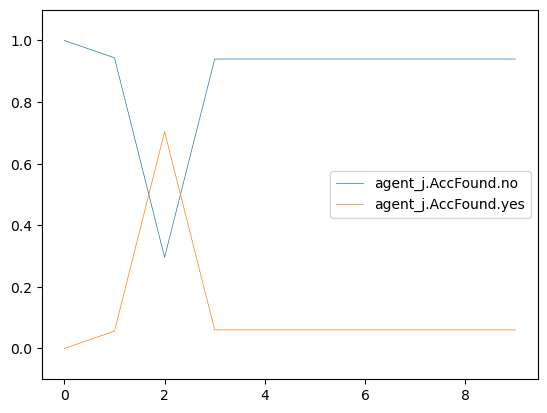

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                             none

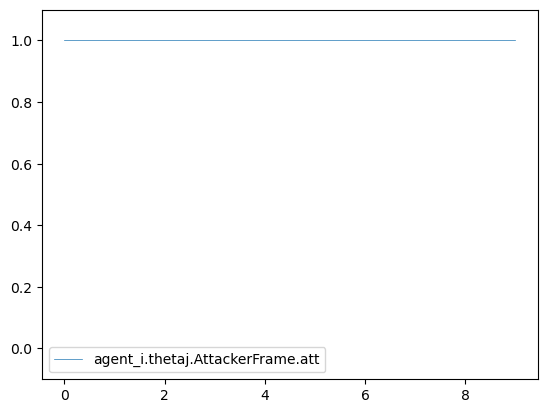

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.001541                        0.998459   
4                         0.001541                        0.998459   
5                         0.001541                        0.998459   
6                         0.001541                        0.998459   
7                         0.001541                        0.998459   
8                         0.001541                        0.998459   
9                         0.001541                        0.998459   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           success                          active   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

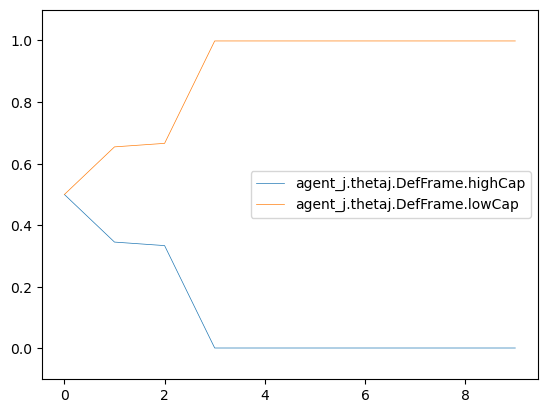

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0  RestrictAccPrivs    EnumAccounts
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0           LogIOCs      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

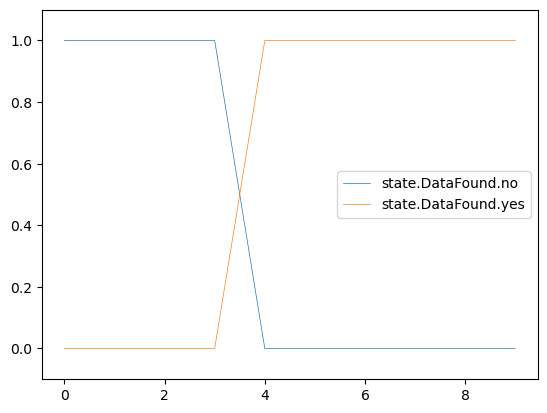

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.369900               0.630100               Nop   
5              0.058510               0.941490               Nop   
6              0.023081               0.976919               Nop   
7              0.022301               0.977699               Nop   
8              0.022255               0.977745               Nop   
9              0.022255               0.977745               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

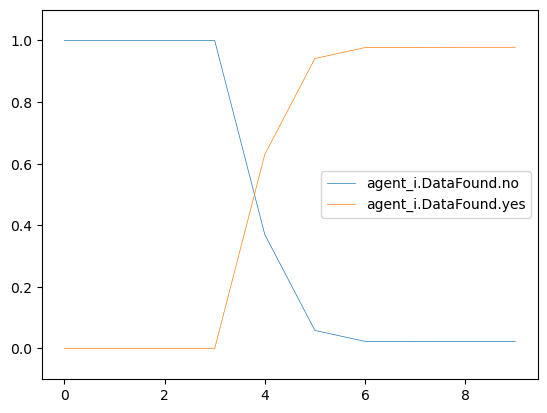

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000    EnumAccounts   
2              1.000000               0.000000      PrivEscAcc   
3              1.000000               0.000000       FileRecon   
4              0.093525               0.906475  ManipulateData   
5              0.000052               0.999948            Exit   
6              0.000052               0.999948             Nop   
7              0.000052               0.999948             Nop   
8              0.000052               0.999948             Nop   
9              0.000052               0.999948             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active               acc_policy_change  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

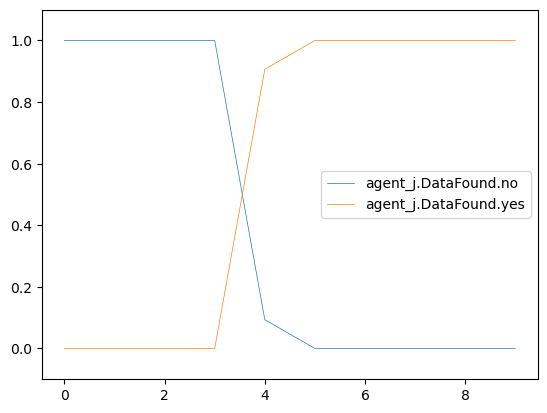

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

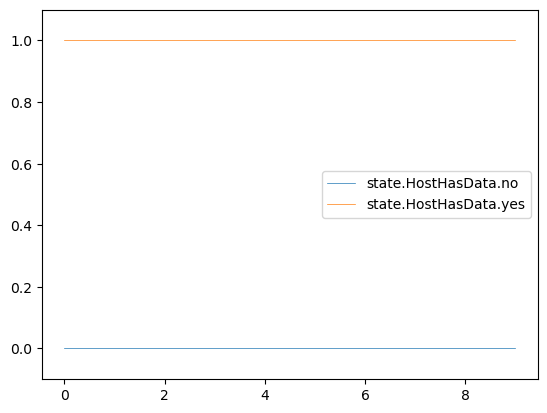

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

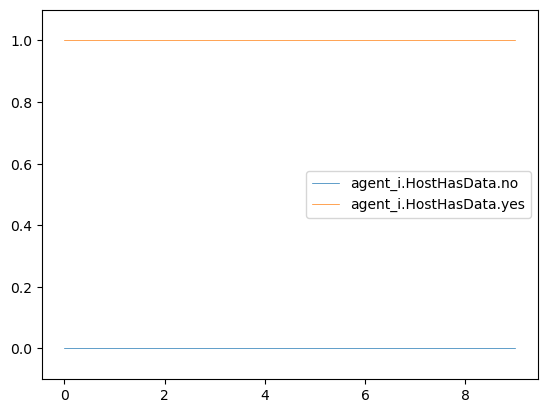

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000    EnumAccounts   
2                0.500000                 0.500000      PrivEscAcc   
3                0.500000                 0.500000       FileRecon   
4                0.071942                 0.928057  ManipulateData   
5                0.000040                 0.999960            Exit   
6                0.000040                 0.999960             Nop   
7                0.000040                 0.999960             Nop   
8                0.000040                 0.999960             Nop   
9                0.000040                 0.999960             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active               acc_policy_change  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

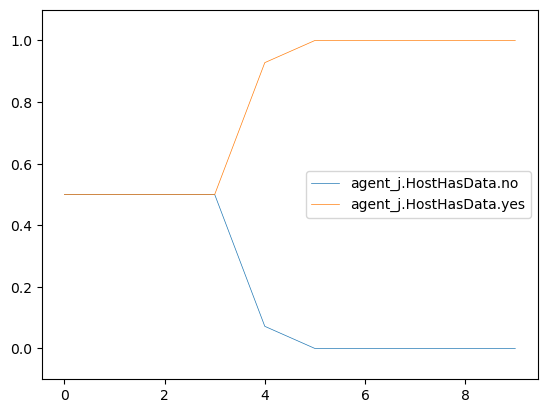

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

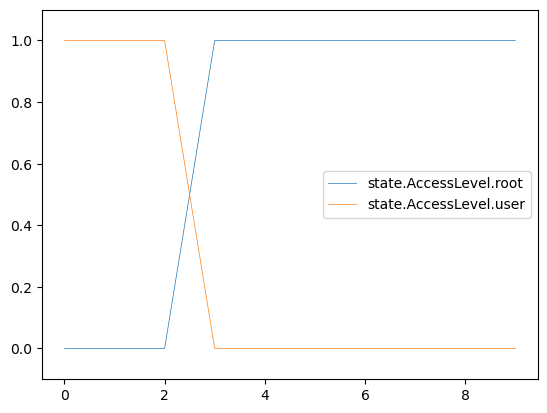

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.562890                  0.437110               Nop   
4                  0.913002                  0.086998               Nop   
5                  0.980596                  0.019404               Nop   
6                  0.978854                  0.021146               Nop   
7                  0.978854                  0.021146               Nop   
8                  0.978836                  0.021164               Nop   
9                  0.978837                  0.021163               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

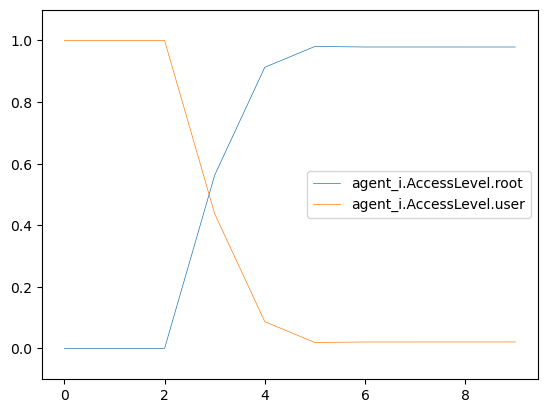

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0    EnumAccounts   
1                       0.0                       1.0    EnumAccounts   
2                       0.0                       1.0      PrivEscAcc   
3                       1.0                       0.0       FileRecon   
4                       1.0                       0.0  ManipulateData   
5                       1.0                       0.0            Exit   
6                       1.0                       0.0             Nop   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active               acc_policy_change  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

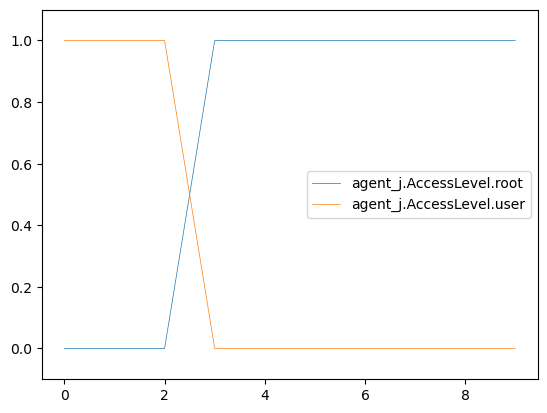

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action  agent_j.action
0                  1.0                   0.0  RestrictAccPrivs    EnumAccounts
1                  1.0                   0.0      DecoyAccount    EnumAccounts
2                  1.0                   0.0           LogIOCs      PrivEscAcc
3                  0.0                   1.0               Nop       FileRecon
4                  0.0                   1.0               Nop  ManipulateData
5                  0.0                   1.0               Nop            Exit
6                  0.0                   1.0               Nop             Nop
7                  0.0                   1.0               Nop             Nop
8                  0.0                   1.0               Nop             Nop
9                  0.0                   1.0               Nop             Nop

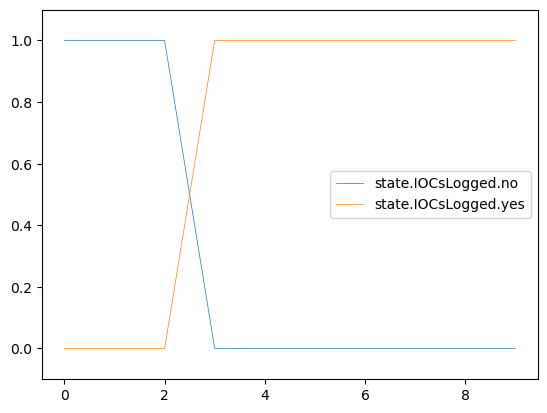

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

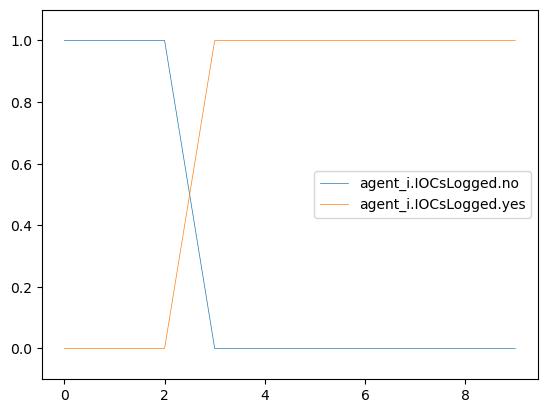

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0               1.000000                0.000000    EnumAccounts   
1               0.981818                0.018182    EnumAccounts   
2               0.998972                0.001028      PrivEscAcc   
3               0.998459                0.001541       FileRecon   
4               0.998459                0.001541  ManipulateData   
5               0.998459                0.001541            Exit   
6               0.998459                0.001541             Nop   
7               0.998459                0.001541             Nop   
8               0.998459                0.001541             Nop   
9               0.998459                0.001541             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active               acc_policy_change  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

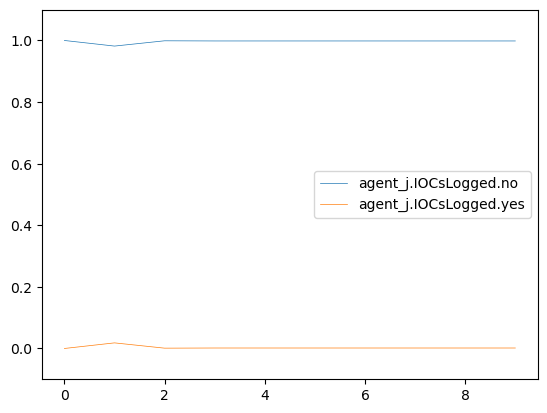

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

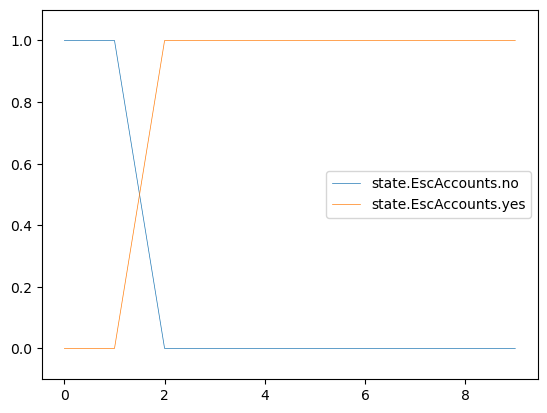

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

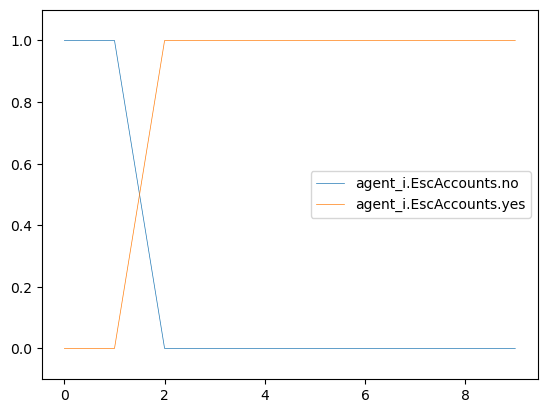

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.725806                 0.274194    EnumAccounts   
2                0.271739                 0.728261      PrivEscAcc   
3                0.000000                 1.000000       FileRecon   
4                0.000000                 1.000000  ManipulateData   
5                0.000000                 1.000000            Exit   
6                0.000000                 1.000000             Nop   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active               acc_policy_change  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

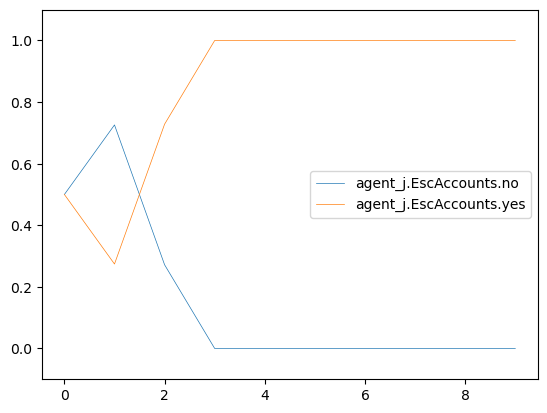

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

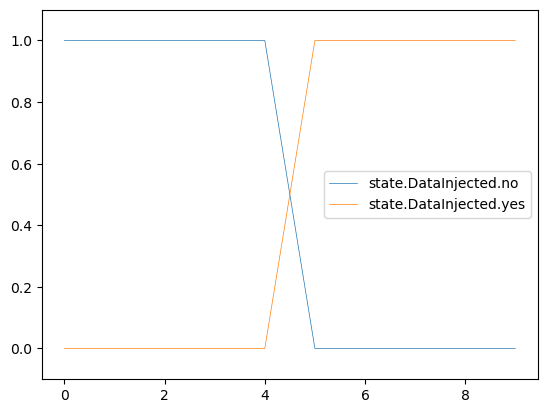

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.114624                  0.885376               Nop   
6                 0.028117                  0.971883               Nop   
7                 0.023585                  0.976415               Nop   
8                 0.022620                  0.977380               Nop   
9                 0.022615                  0.977385               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

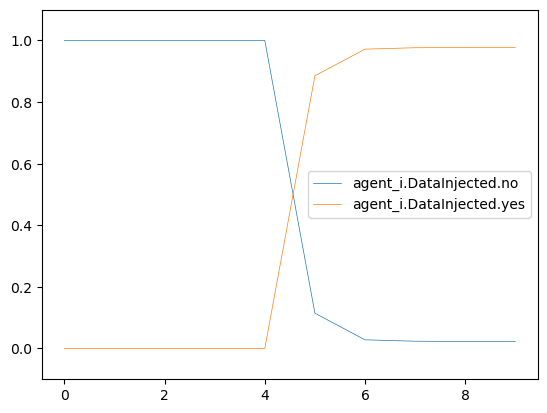

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000052                  0.999948            Exit   
6                 0.000052                  0.999948             Nop   
7                 0.000052                  0.999948             Nop   
8                 0.000052                  0.999948             Nop   
9                 0.000052                  0.999948             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active               acc_policy_change  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

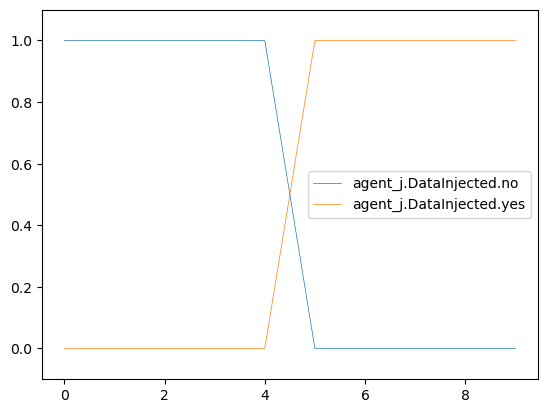

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0  RestrictAccPrivs    EnumAccounts  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0           LogIOCs      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

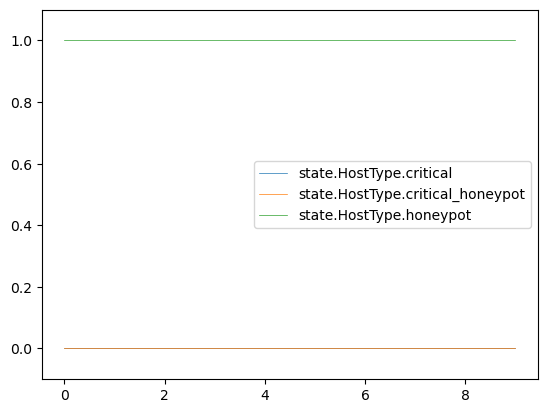

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0  RestrictAccPrivs    EnumAccounts   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0           LogIOCs      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                       file_write  
9                             none

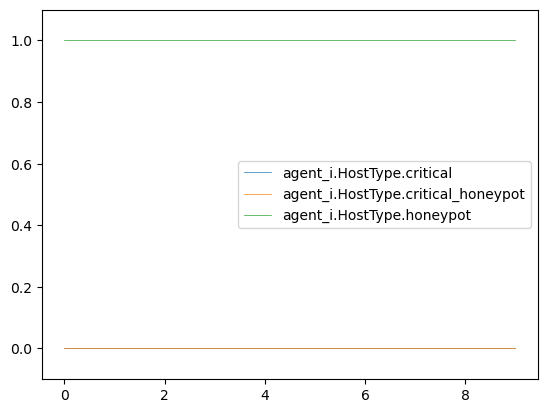

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts  RestrictAccPrivs   
1                        0.0    EnumAccounts      DecoyAccount   
2                        0.0      PrivEscAcc           LogIOCs   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           success                          active   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

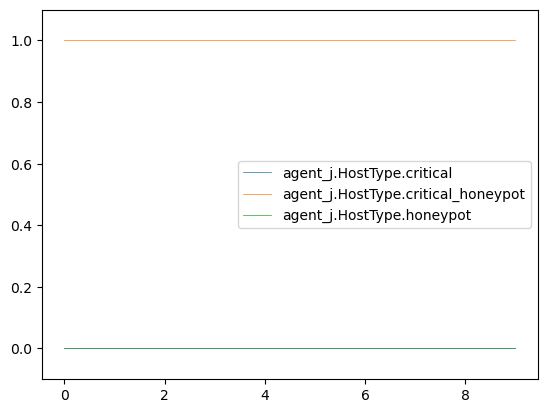

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0  RestrictAccPrivs    EnumAccounts
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0           LogIOCs      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

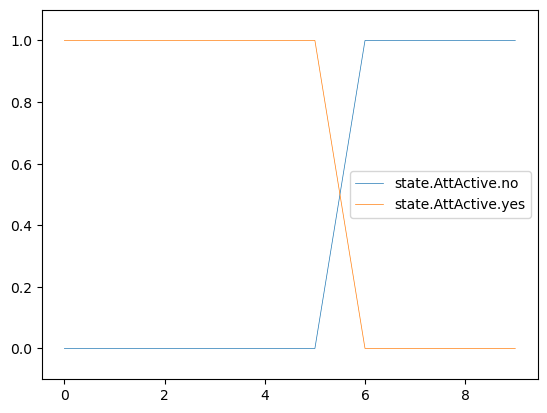

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000  RestrictAccPrivs   
1              0.000000               1.000000      DecoyAccount   
2              0.016212               0.983788           LogIOCs   
3              0.320958               0.679042               Nop   
4              0.085774               0.914226               Nop   
5              0.019404               0.980596               Nop   
6              0.985040               0.014960               Nop   
7              0.993871               0.006129               Nop   
8              0.999855               0.000145               Nop   
9              0.999963               0.000037               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

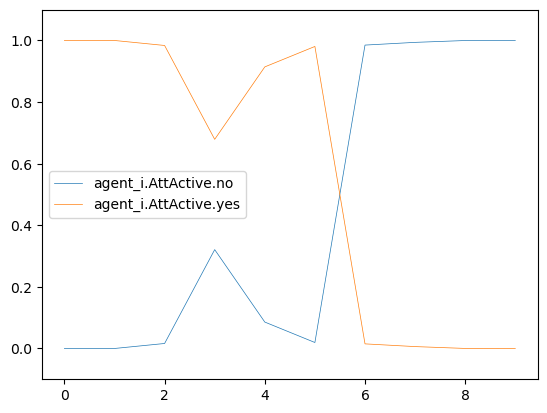

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active               acc_policy_change  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

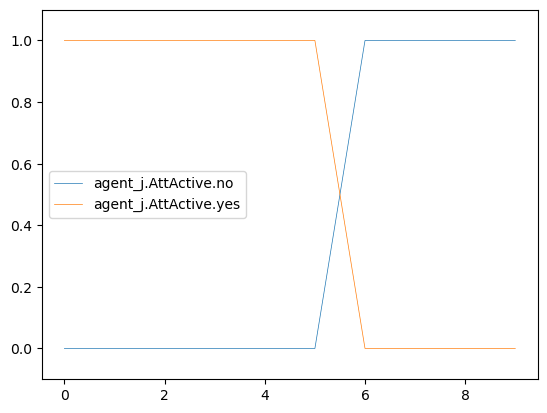

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0  RestrictAccPrivs   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0           LogIOCs   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

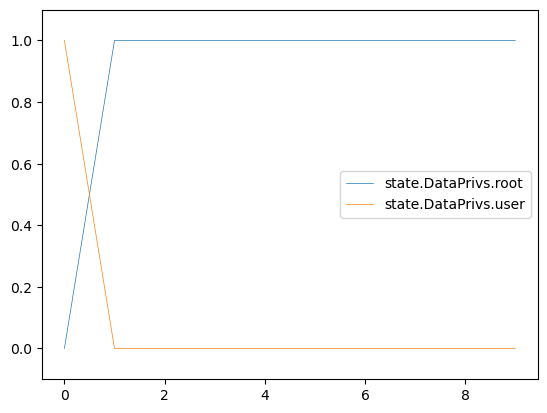

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

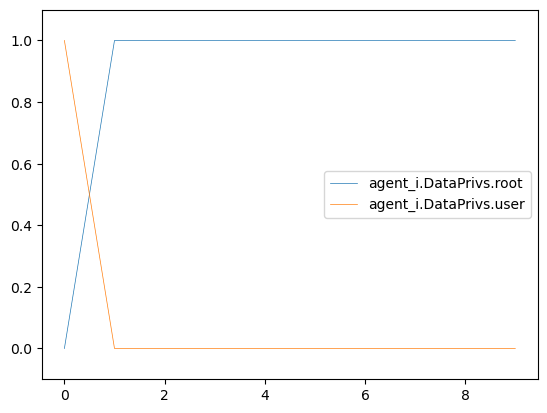

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.990909                0.009091    EnumAccounts   
2                1.000000                0.000000      PrivEscAcc   
3                1.000000                0.000000       FileRecon   
4                1.000000                0.000000  ManipulateData   
5                1.000000                0.000000            Exit   
6                1.000000                0.000000             Nop   
7                1.000000                0.000000             Nop   
8                1.000000                0.000000             Nop   
9                1.000000                0.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active               acc_policy_change  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

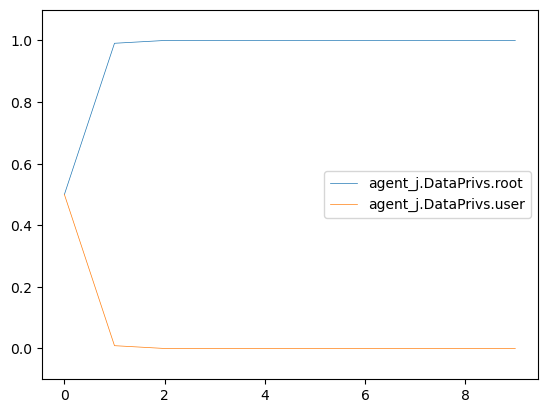

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0  RestrictAccPrivs    EnumAccounts
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0           LogIOCs      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

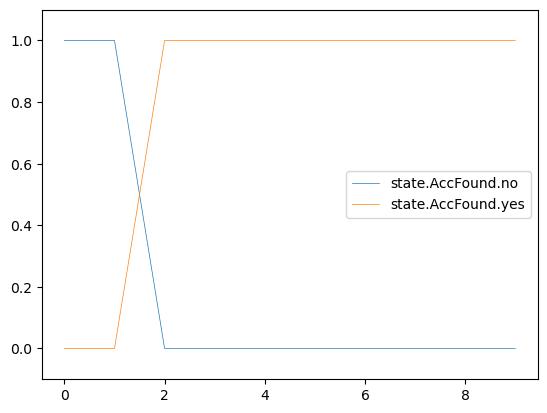

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000  RestrictAccPrivs   
1             1.000000              0.000000      DecoyAccount   
2             0.322696              0.677304           LogIOCs   
3             0.312023              0.687977               Nop   
4             0.071281              0.928719               Nop   
5             0.015898              0.984102               Nop   
6             0.017325              0.982675               Nop   
7             0.017325              0.982675               Nop   
8             0.017341              0.982659               Nop   
9             0.017340              0.982660               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

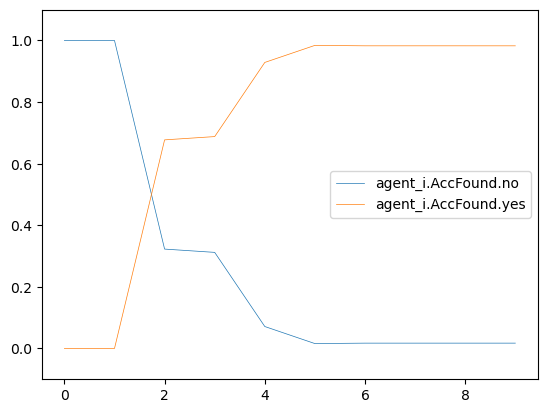

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.943548              0.056452    EnumAccounts   
2             0.296196              0.703804      PrivEscAcc   
3             0.000000              1.000000       FileRecon   
4             0.000000              1.000000  ManipulateData   
5             0.000000              1.000000            Exit   
6             0.000000              1.000000             Nop   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active               acc_policy_change  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

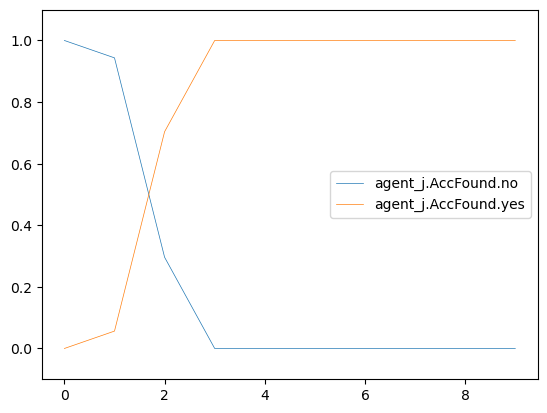

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                             none
4                               1.0                             none
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                        file_enum

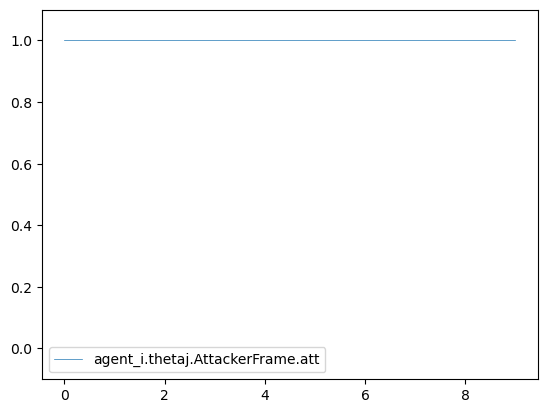

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.334019                        0.665982   
4                         0.334019                        0.665982   
5                         0.334019                        0.665982   
6                         0.334019                        0.665982   
7                         0.334019                        0.665982   
8                         0.334019                        0.665982   
9                         0.334019                        0.665982   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                         none   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

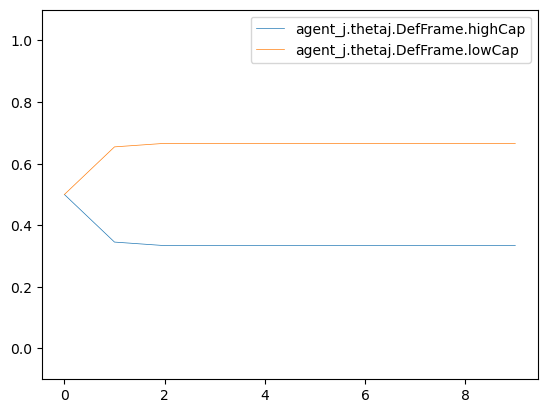

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount   EnumAccounts
2                 1.0                  0.0           LogIOCs           Exit
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

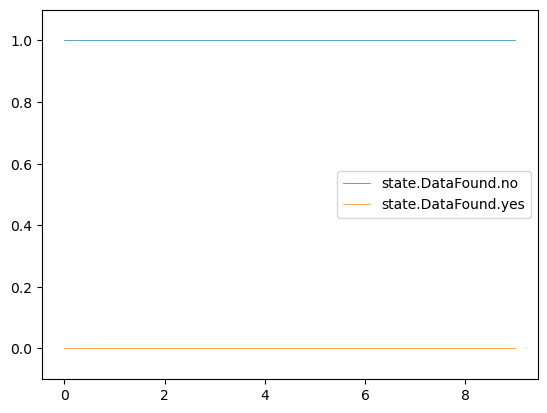

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.628609               0.371391               Nop   
5              0.874547               0.125453               Nop   
6              0.719535               0.280465               Nop   
7              0.724522               0.275478               Nop   
8              0.722756               0.277244               Nop   
9              0.722758               0.277242               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                   login_activity  
3            Nop                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                        file_enum

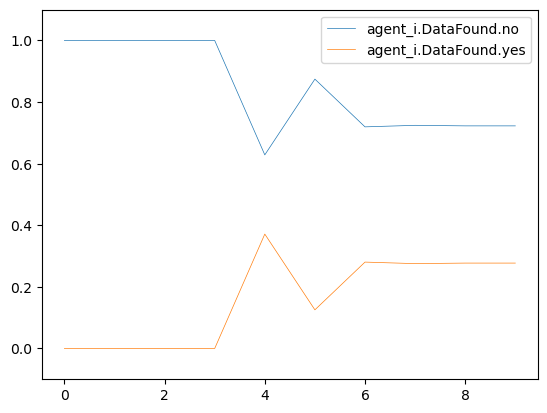

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0   EnumAccounts   
2                   1.0                    0.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

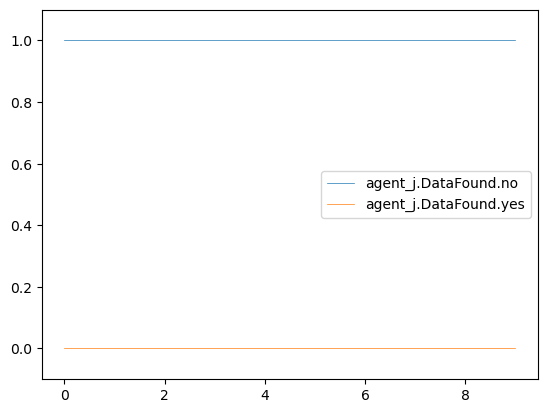

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

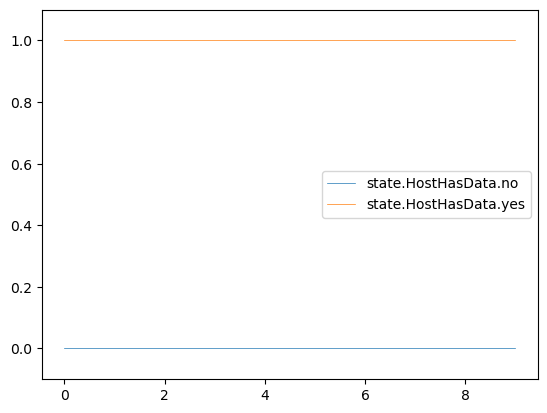

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                   login_activity  
3            Nop                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                        file_enum

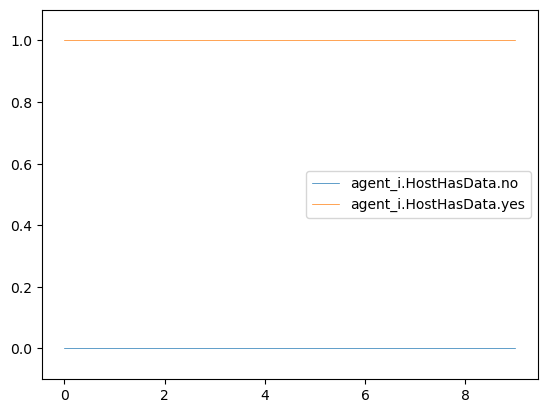

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5   EnumAccounts   
2                     0.5                      0.5           Exit   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

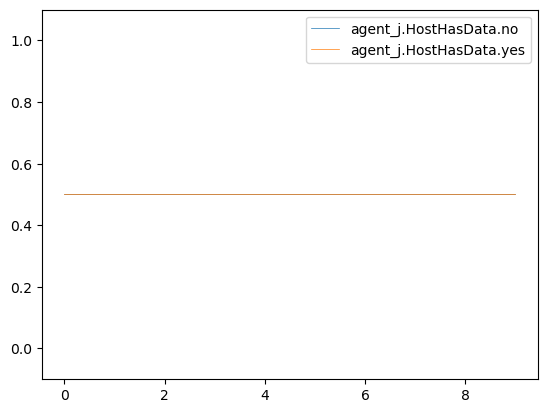

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0               Nop   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

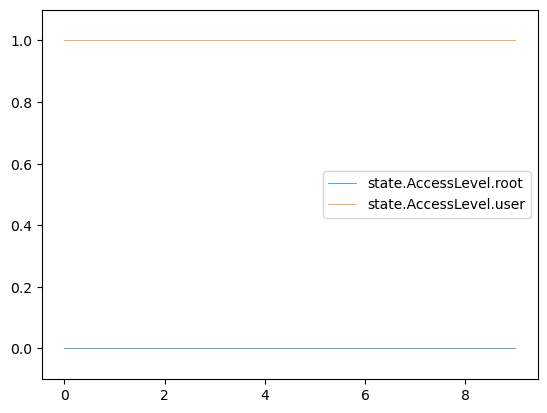

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.883146                  0.116854               Nop   
4                  0.531641                  0.468359               Nop   
5                  0.139533                  0.860467               Nop   
6                  0.287291                  0.712708               Nop   
7                  0.278367                  0.721633               Nop   
8                  0.280175                  0.719825               Nop   
9                  0.280173                  0.719827               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                   login_activity  
3            Nop                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                        file_enum

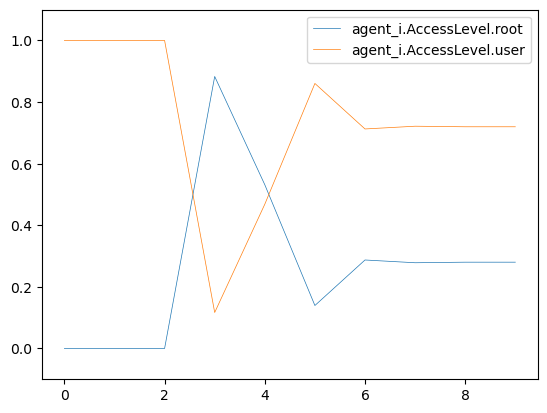

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0           Exit   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

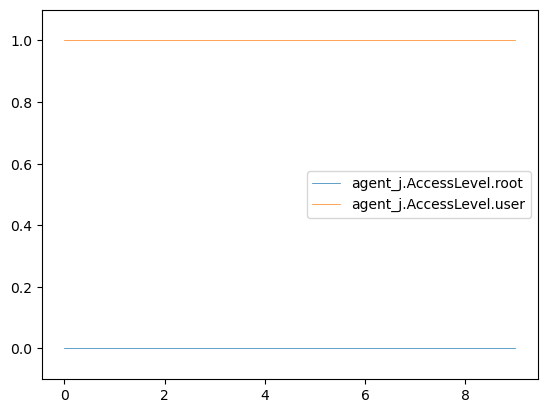

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount   EnumAccounts
2                  1.0                   0.0           LogIOCs           Exit
3                  0.0                   1.0               Nop            Nop
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

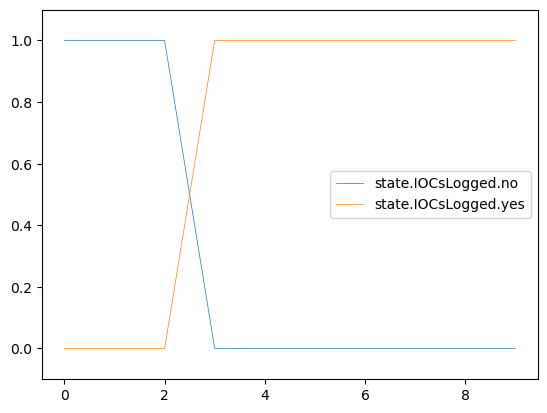

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                   login_activity  
3            Nop                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                        file_enum

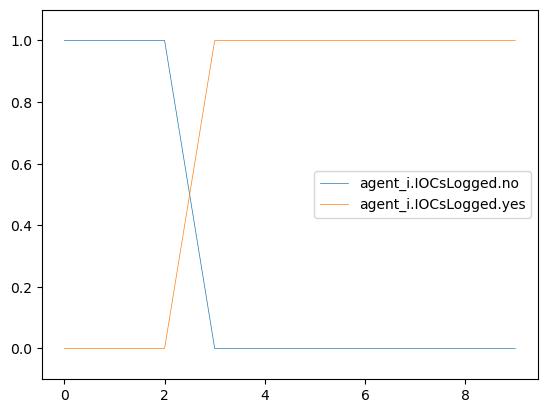

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.981818                0.018182   EnumAccounts   
2               0.998972                0.001028           Exit   
3               0.998972                0.001028            Nop   
4               0.998972                0.001028            Nop   
5               0.998972                0.001028            Nop   
6               0.998972                0.001028            Nop   
7               0.998972                0.001028            Nop   
8               0.998972                0.001028            Nop   
9               0.998972                0.001028            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

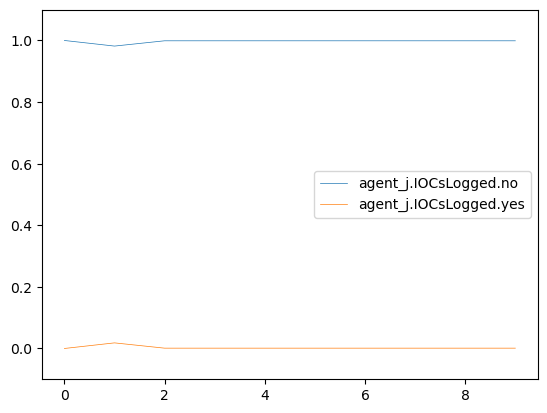

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

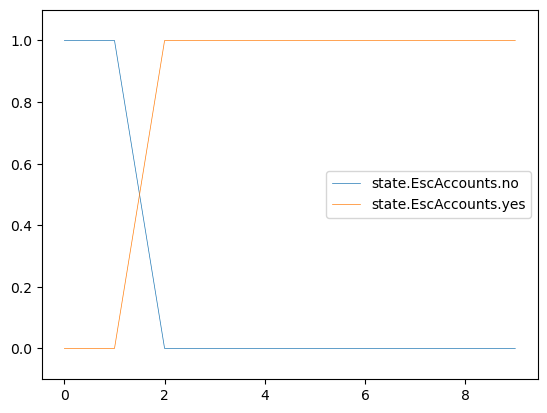

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                   login_activity  
3            Nop                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                        file_enum

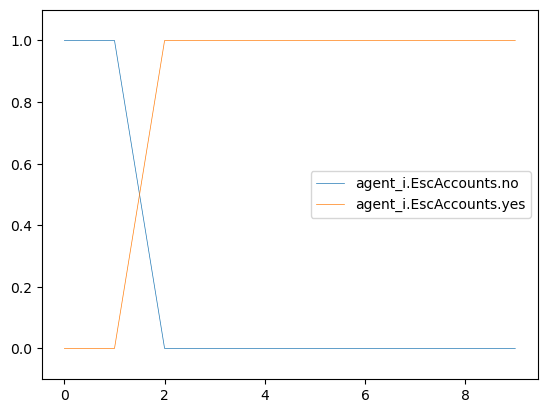

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194   EnumAccounts   
2                0.891285                 0.108715           Exit   
3                0.890369                 0.109631            Nop   
4                0.890369                 0.109631            Nop   
5                0.890369                 0.109631            Nop   
6                0.890369                 0.109631            Nop   
7                0.890369                 0.109631            Nop   
8                0.890369                 0.109631            Nop   
9                0.890369                 0.109631            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

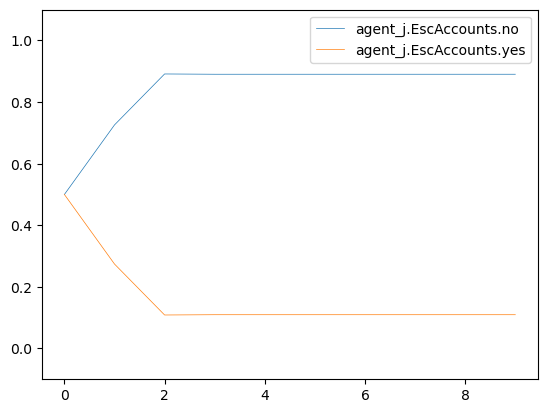

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

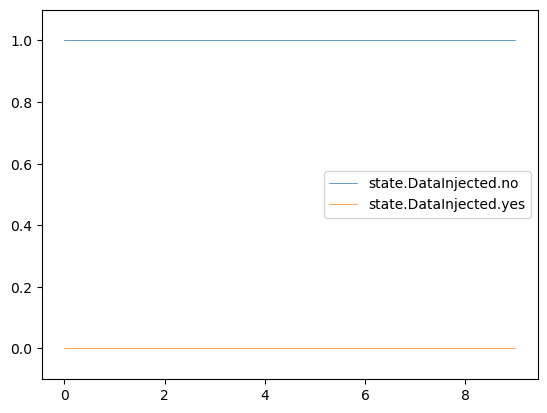

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.912273                  0.087727               Nop   
6                 0.730475                  0.269525               Nop   
7                 0.725910                  0.274090               Nop   
8                 0.723761                  0.276239               Nop   
9                 0.723760                  0.276241               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                   login_activity  
3            Nop                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                        file_enum

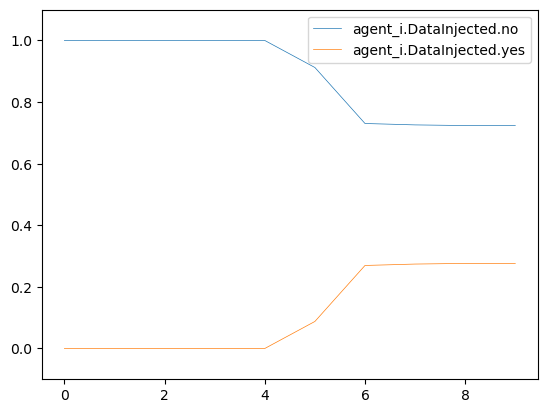

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0           Exit   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

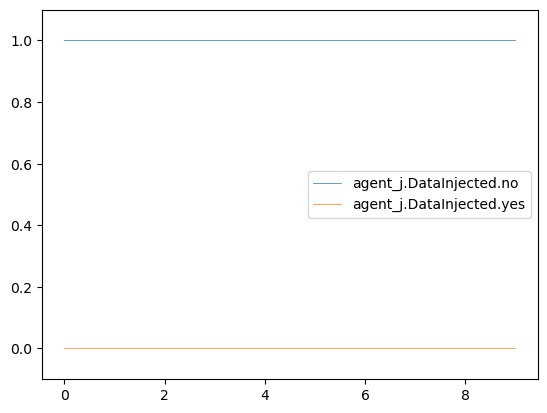

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount   EnumAccounts  
2                      1.0           LogIOCs           Exit  
3                      1.0               Nop            Nop  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

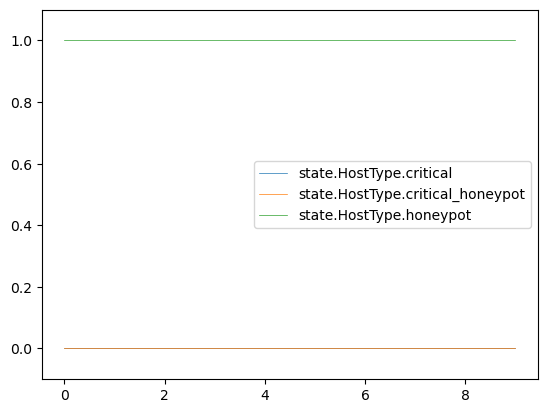

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount   EnumAccounts   
2                        1.0           LogIOCs           Exit   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                             none  
4                             none  
5                       file_write  
6                             none  
7                       file_write  
8                             none  
9                        file_enum

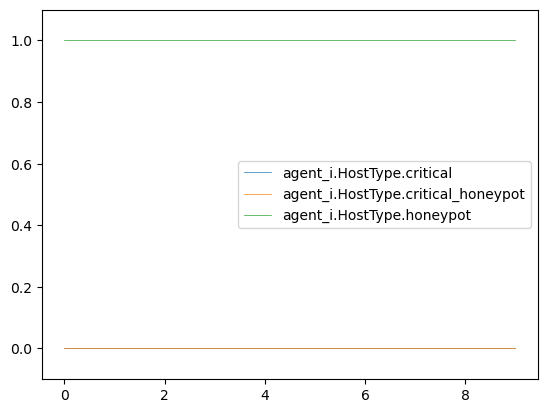

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0   EnumAccounts  RestrictAccPrivs   
1                        0.0   EnumAccounts      DecoyAccount   
2                        0.0           Exit           LogIOCs   
3                        0.0            Nop               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                         none   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

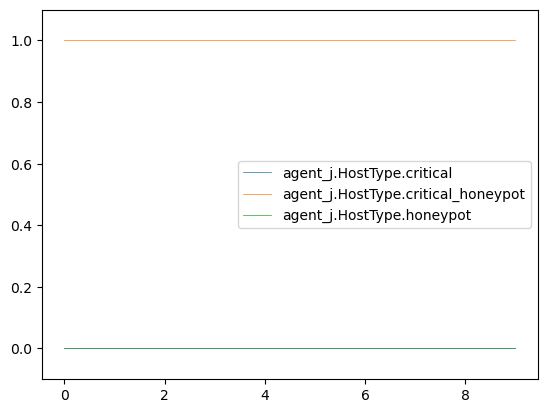

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount   EnumAccounts
2                 0.0                  1.0           LogIOCs           Exit
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

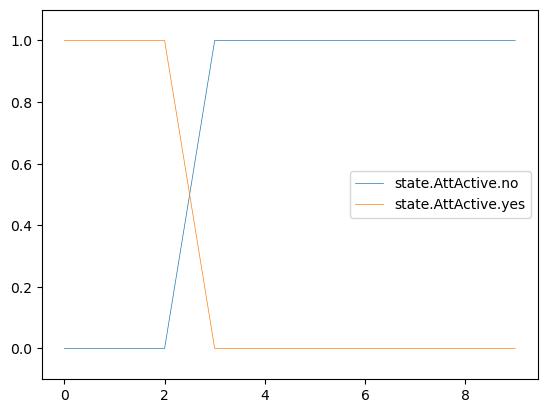

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000           1.000000e+00  RestrictAccPrivs   
1              0.000000           1.000000e+00      DecoyAccount   
2              0.016212           9.837884e-01           LogIOCs   
3              0.071938           9.280618e-01               Nop   
4              0.465781           5.342192e-01               Nop   
5              0.860467           1.395328e-01               Nop   
6              0.785299           2.147010e-01               Nop   
7              0.997913           2.086917e-03               Nop   
8              0.997072           2.928131e-03               Nop   
9              0.999999           5.649584e-07               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                   login_activity  
3            Nop                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                        file_enum

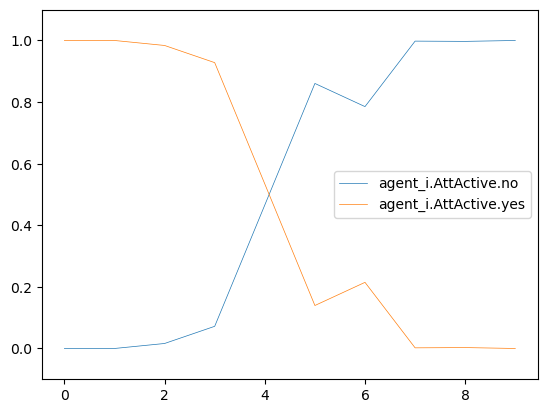

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

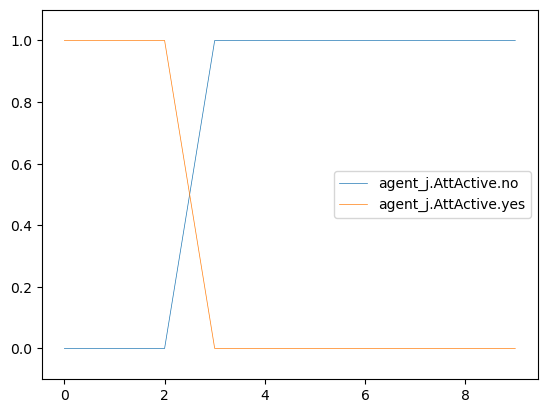

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount   EnumAccounts
2                   1.0                   0.0           LogIOCs           Exit
3                   1.0                   0.0               Nop            Nop
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

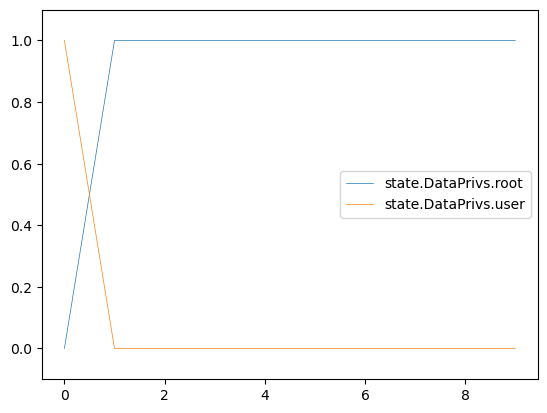

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                   login_activity  
3            Nop                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                        file_enum

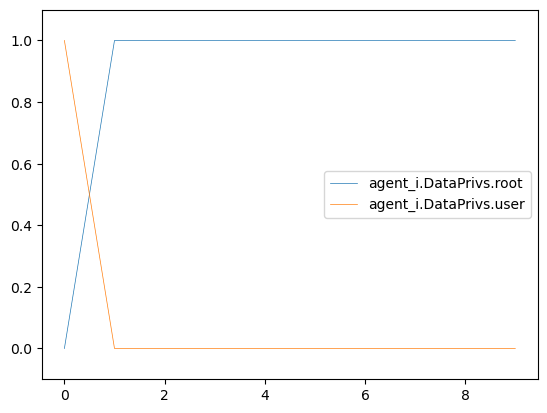

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.990909                0.009091   EnumAccounts   
2                1.000000                0.000000           Exit   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

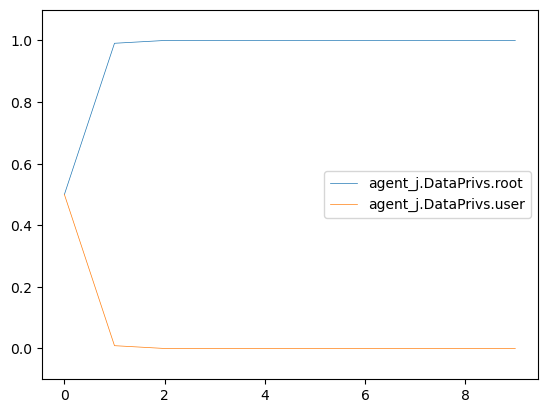

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount   EnumAccounts
2                1.0                 0.0           LogIOCs           Exit
3                1.0                 0.0               Nop            Nop
4                1.0                 0.0               Nop            Nop
5                1.0                 0.0               Nop            Nop
6                1.0                 0.0               Nop            Nop
7                1.0                 0.0               Nop            Nop
8                1.0                 0.0               Nop            Nop
9                1.0                 0.0               Nop            Nop

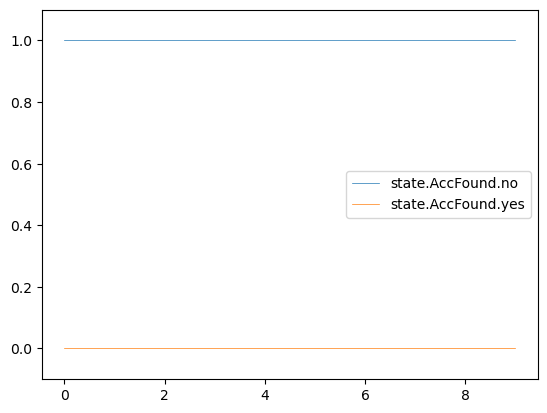

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount   EnumAccounts   
2             0.322696              0.677304           LogIOCs           Exit   
3             0.100833              0.899167               Nop            Nop   
4             0.408566              0.591434               Nop            Nop   
5             0.750616              0.249384               Nop            Nop   
6             0.621720              0.378280               Nop            Nop   
7             0.629505              0.370495               Nop            Nop   
8             0.627928              0.372072               Nop            Nop   
9             0.627930              0.372070               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                             none  
4                             none  
5                       file_write  
6                             none  
7                       file_write  
8                             none  
9                        file_enum

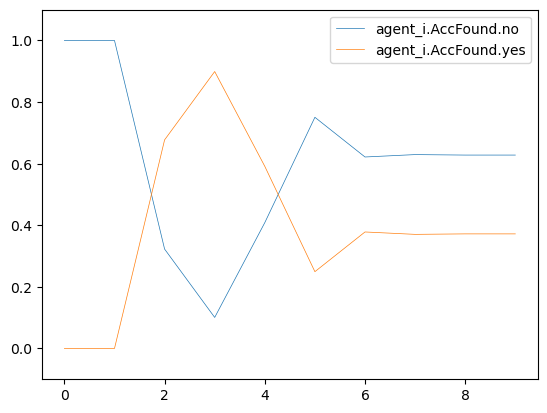

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452   EnumAccounts      DecoyAccount   
2             0.971501              0.028499           Exit           LogIOCs   
3             0.971501              0.028499            Nop               Nop   
4             0.971501              0.028499            Nop               Nop   
5             0.971501              0.028499            Nop               Nop   
6             0.971501              0.028499            Nop               Nop   
7             0.971501              0.028499            Nop               Nop   
8             0.971501              0.028499            Nop               Nop   
9             0.971501              0.028499            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                          denied                         none   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                         none   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

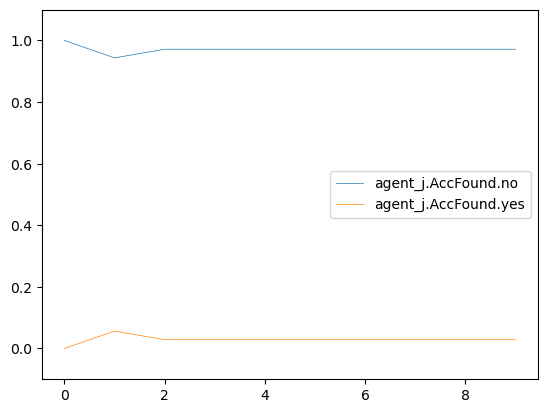

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                             none
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                       file_write
9                               1.0                             none

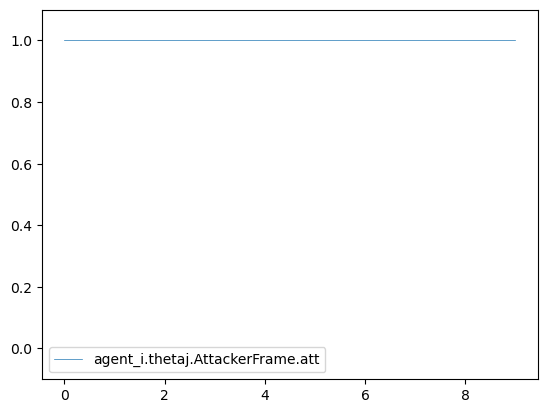

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.001541                        0.998459   
4                         0.001541                        0.998459   
5                         0.001541                        0.998459   
6                         0.001541                        0.998459   
7                         0.001541                        0.998459   
8                         0.001541                        0.998459   
9                         0.001541                        0.998459   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           success                          active   
5                           success                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

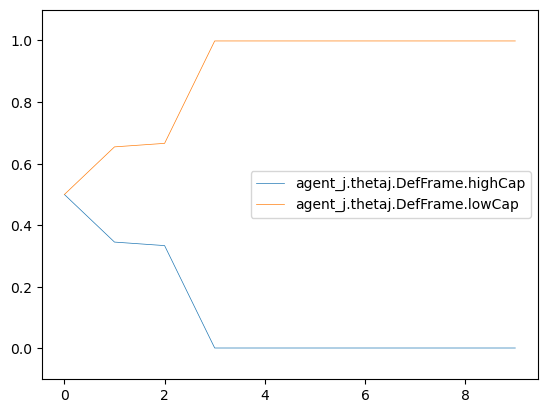

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0  RestrictAccPrivs    EnumAccounts
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0           LogIOCs      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 1.0                  0.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

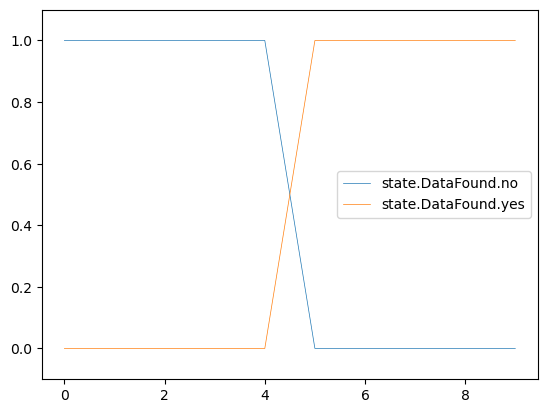

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.312986               0.687014               Nop   
5              0.204200               0.795800               Nop   
6              0.072389               0.927611               Nop   
7              0.061849               0.938151               Nop   
8              0.061494               0.938506               Nop   
9              0.061492               0.938508               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

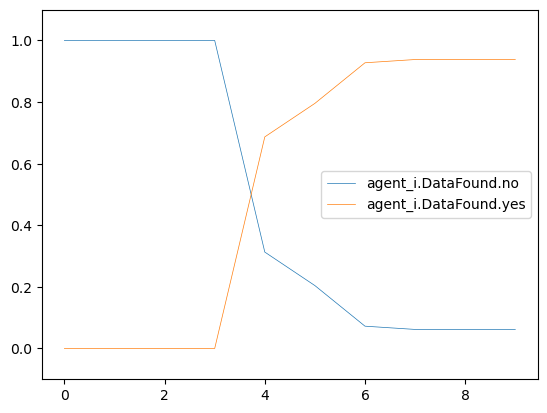

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000    EnumAccounts   
2              1.000000               0.000000      PrivEscAcc   
3              1.000000               0.000000       FileRecon   
4              0.893130               0.106870       FileRecon   
5              0.142112               0.857888  ManipulateData   
6              0.000083               0.999917            Exit   
7              0.000083               0.999917             Nop   
8              0.000083               0.999917             Nop   
9              0.000083               0.999917             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

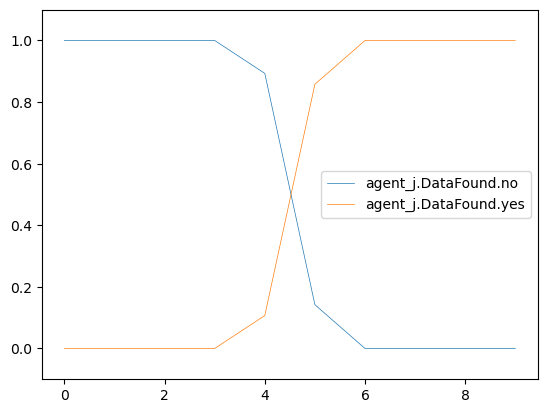

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

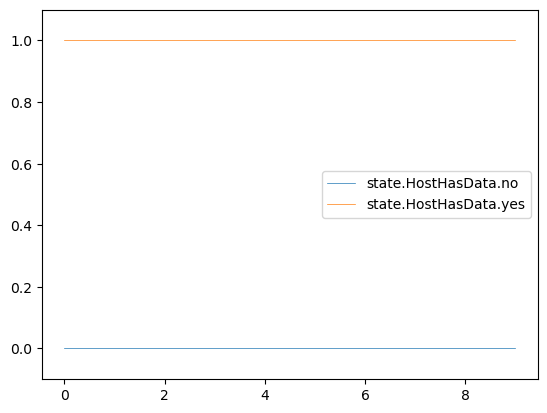

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

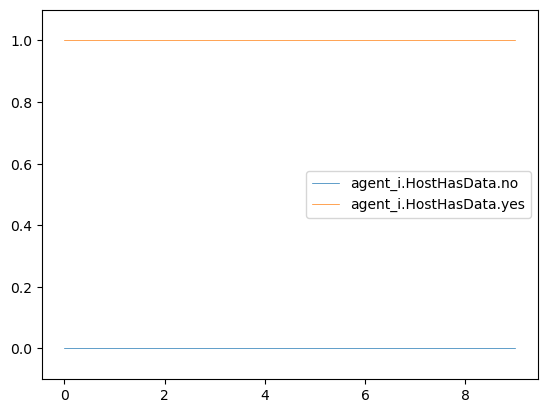

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000    EnumAccounts   
2                0.500000                 0.500000      PrivEscAcc   
3                0.500000                 0.500000       FileRecon   
4                0.687023                 0.312977       FileRecon   
5                0.130378                 0.869622  ManipulateData   
6                0.000076                 0.999924            Exit   
7                0.000076                 0.999924             Nop   
8                0.000076                 0.999924             Nop   
9                0.000076                 0.999924             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

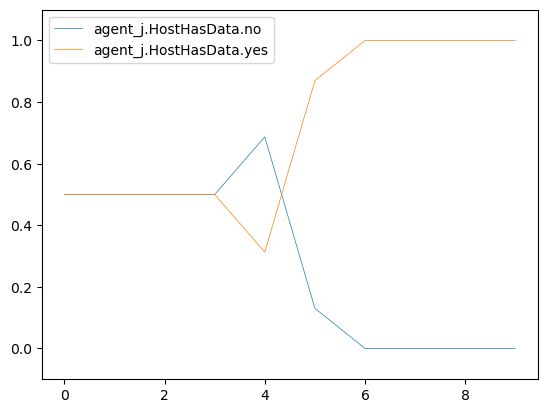

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

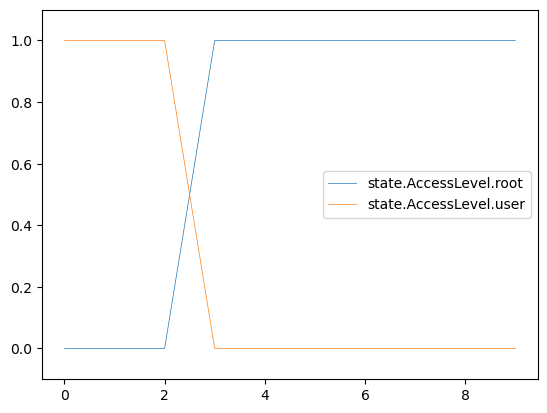

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.883146                  0.116854               Nop   
4                  0.981735                  0.018265               Nop   
5                  0.884771                  0.115229               Nop   
6                  0.950137                  0.049863               Nop   
7                  0.948017                  0.051983               Nop   
8                  0.948455                  0.051545               Nop   
9                  0.948458                  0.051542               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

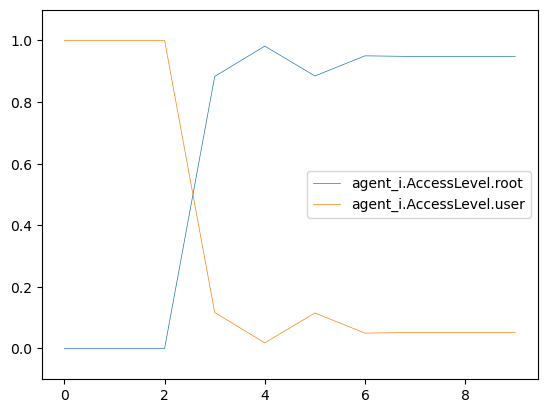

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0    EnumAccounts   
1                       0.0                       1.0    EnumAccounts   
2                       0.0                       1.0      PrivEscAcc   
3                       1.0                       0.0       FileRecon   
4                       1.0                       0.0       FileRecon   
5                       1.0                       0.0  ManipulateData   
6                       1.0                       0.0            Exit   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

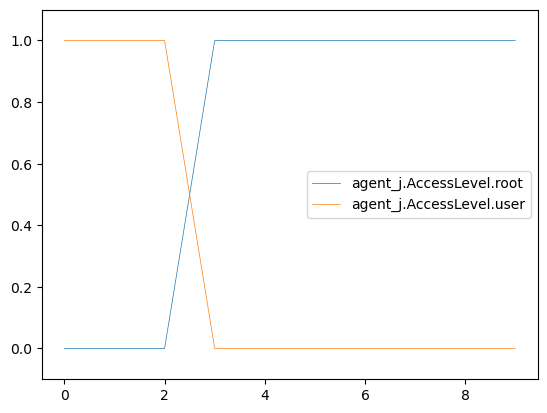

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action  agent_j.action
0                  1.0                   0.0  RestrictAccPrivs    EnumAccounts
1                  1.0                   0.0      DecoyAccount    EnumAccounts
2                  1.0                   0.0           LogIOCs      PrivEscAcc
3                  0.0                   1.0               Nop       FileRecon
4                  0.0                   1.0               Nop       FileRecon
5                  0.0                   1.0               Nop  ManipulateData
6                  0.0                   1.0               Nop            Exit
7                  0.0                   1.0               Nop             Nop
8                  0.0                   1.0               Nop             Nop
9                  0.0                   1.0               Nop             Nop

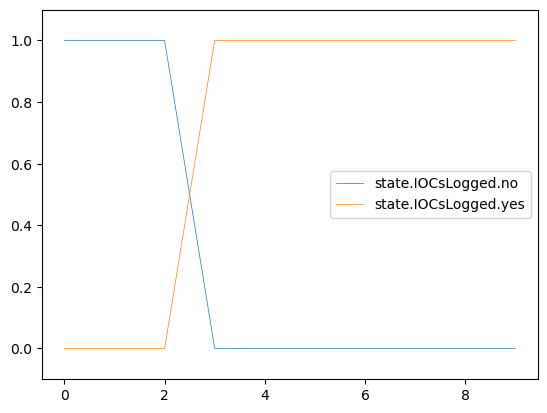

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

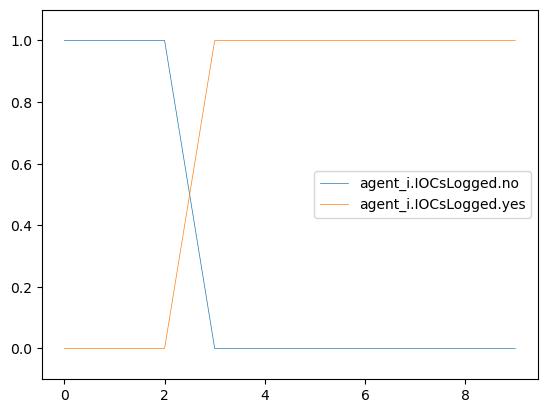

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0               1.000000                0.000000    EnumAccounts   
1               0.981818                0.018182    EnumAccounts   
2               0.998972                0.001028      PrivEscAcc   
3               0.998459                0.001541       FileRecon   
4               0.998459                0.001541       FileRecon   
5               0.998459                0.001541  ManipulateData   
6               0.998459                0.001541            Exit   
7               0.998459                0.001541             Nop   
8               0.998459                0.001541             Nop   
9               0.998459                0.001541             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

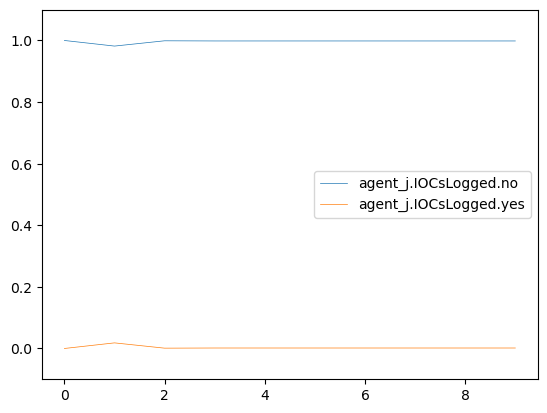

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

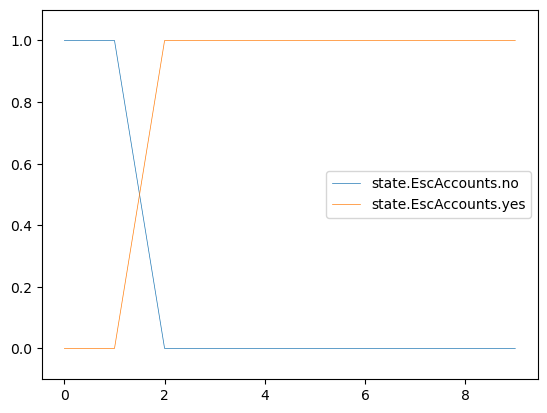

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

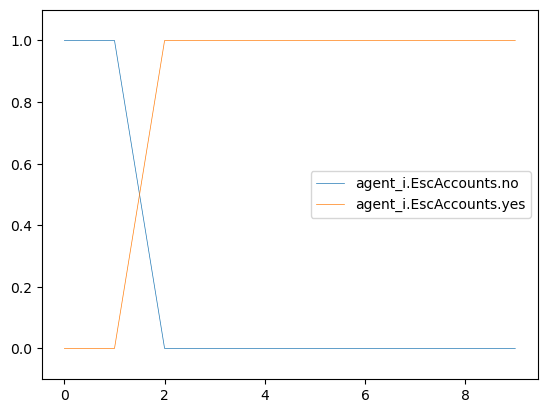

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.725806                 0.274194    EnumAccounts   
2                0.271739                 0.728261      PrivEscAcc   
3                0.000000                 1.000000       FileRecon   
4                0.000000                 1.000000       FileRecon   
5                0.000000                 1.000000  ManipulateData   
6                0.000000                 1.000000            Exit   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

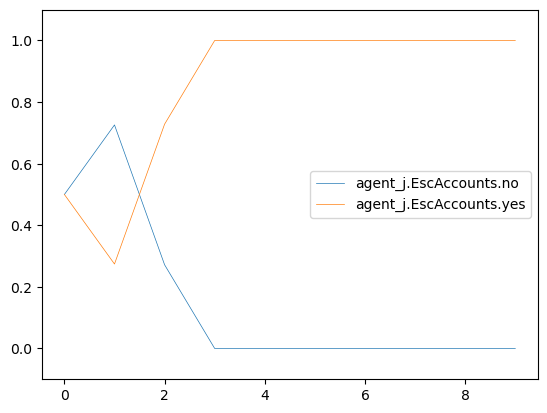

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

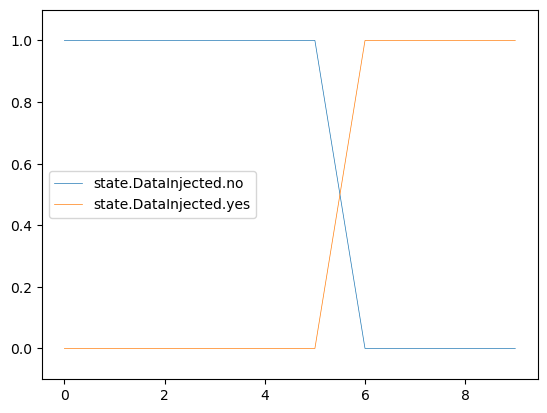

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.442757                  0.557243               Nop   
6                 0.108514                  0.891486               Nop   
7                 0.066575                  0.933425               Nop   
8                 0.064904                  0.935096               Nop   
9                 0.064893                  0.935107               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

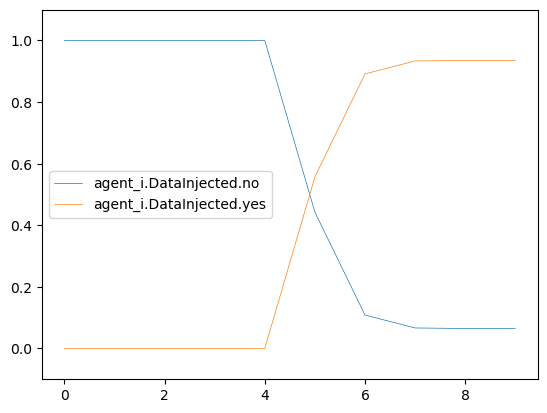

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.000083                  0.999917            Exit   
7                 0.000083                  0.999917             Nop   
8                 0.000083                  0.999917             Nop   
9                 0.000083                  0.999917             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

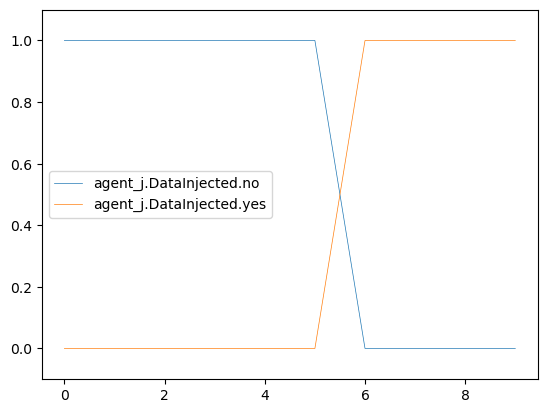

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0  RestrictAccPrivs    EnumAccounts  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0           LogIOCs      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

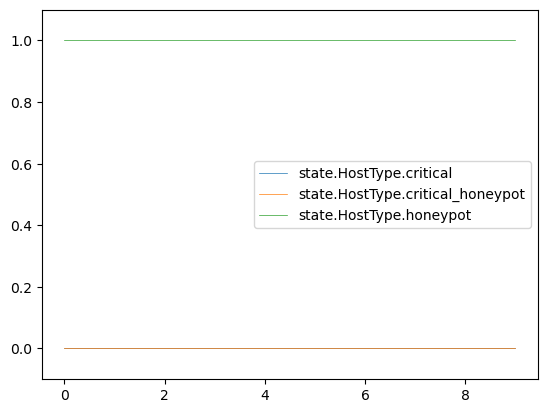

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0  RestrictAccPrivs    EnumAccounts   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0           LogIOCs      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                             none  
5                       file_write  
6                             none  
7                       file_write  
8                       file_write  
9                             none

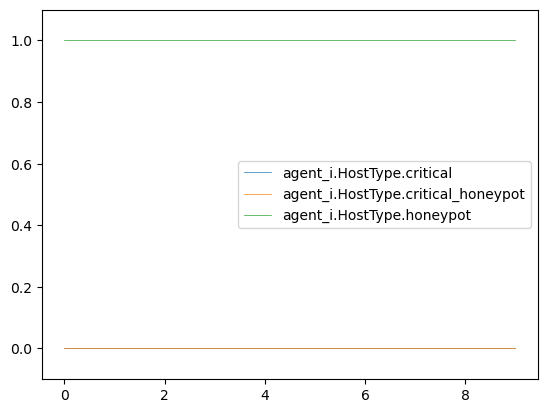

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts  RestrictAccPrivs   
1                        0.0    EnumAccounts      DecoyAccount   
2                        0.0      PrivEscAcc           LogIOCs   
3                        0.0       FileRecon               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           success                          active   
5                           success                          active   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

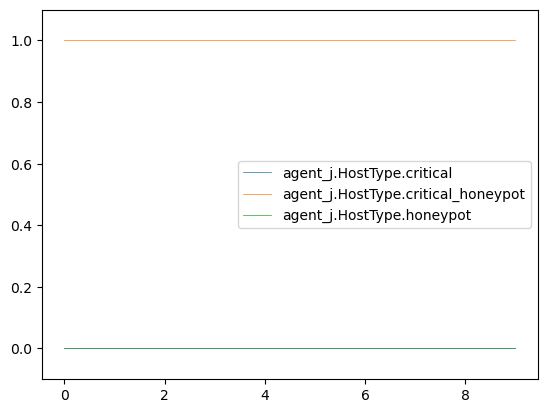

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0  RestrictAccPrivs    EnumAccounts
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0           LogIOCs      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

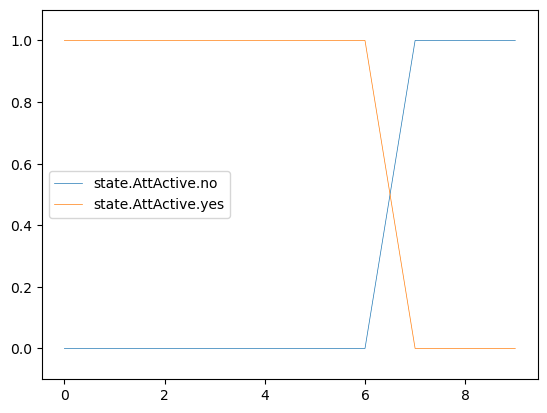

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000  RestrictAccPrivs   
1              0.000000               1.000000      DecoyAccount   
2              0.016212               0.983788           LogIOCs   
3              0.071938               0.928062               Nop   
4              0.017584               0.982416               Nop   
5              0.115229               0.884771               Nop   
6              0.290760               0.709240               Nop   
7              0.992916               0.007084               Nop   
8              0.990161               0.009839               Nop   
9              0.999935               0.000065               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

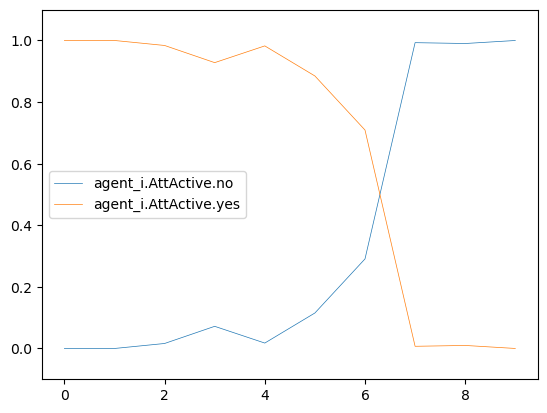

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

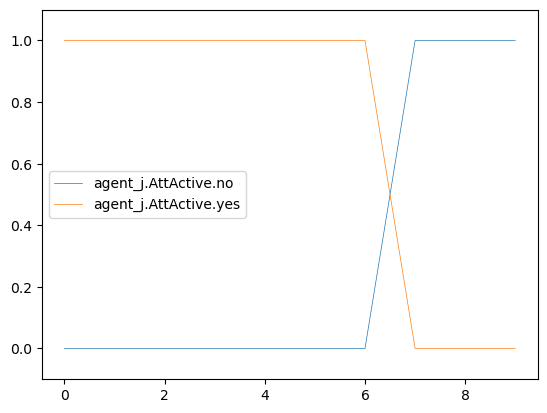

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0  RestrictAccPrivs   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0           LogIOCs   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

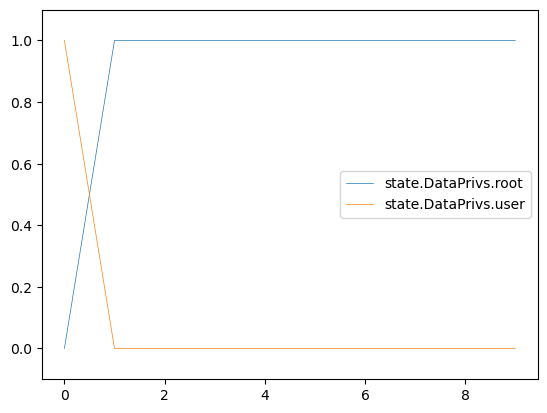

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

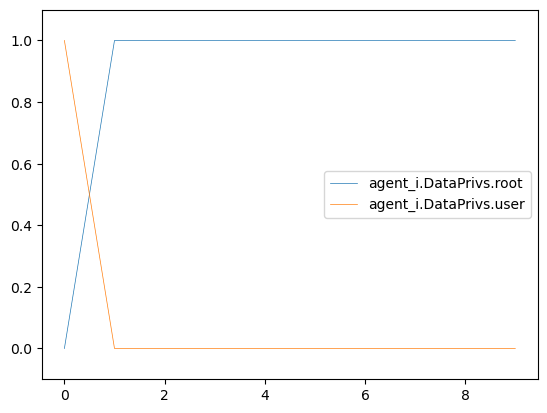

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.990909                0.009091    EnumAccounts   
2                1.000000                0.000000      PrivEscAcc   
3                1.000000                0.000000       FileRecon   
4                1.000000                0.000000       FileRecon   
5                1.000000                0.000000  ManipulateData   
6                1.000000                0.000000            Exit   
7                1.000000                0.000000             Nop   
8                1.000000                0.000000             Nop   
9                1.000000                0.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

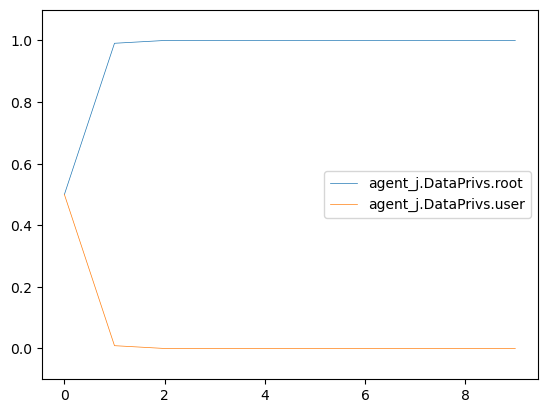

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0  RestrictAccPrivs    EnumAccounts
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0           LogIOCs      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

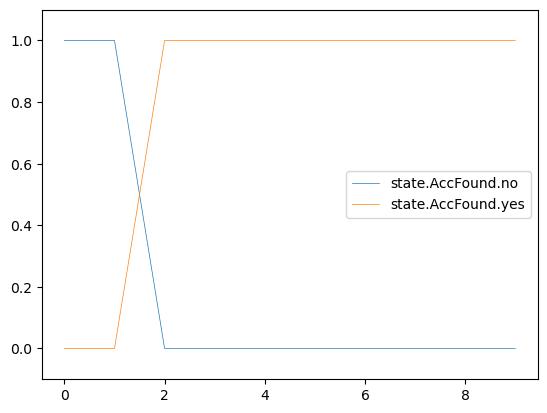

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000  RestrictAccPrivs   
1             1.000000              0.000000      DecoyAccount   
2             0.322696              0.677304           LogIOCs   
3             0.100833              0.899167               Nop   
4             0.016008              0.983992               Nop   
5             0.100989              0.899011               Nop   
6             0.043701              0.956299               Nop   
7             0.045558              0.954442               Nop   
8             0.045175              0.954825               Nop   
9             0.045172              0.954828               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

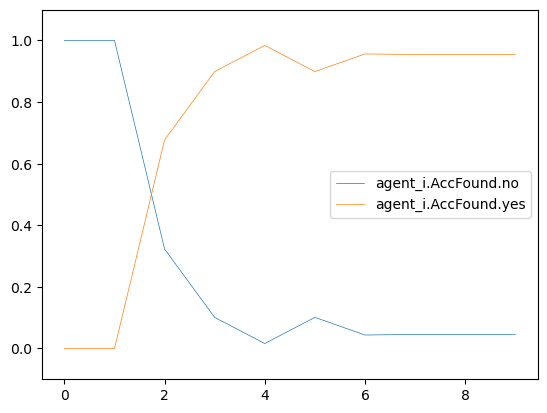

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.943548              0.056452    EnumAccounts   
2             0.296196              0.703804      PrivEscAcc   
3             0.000000              1.000000       FileRecon   
4             0.000000              1.000000       FileRecon   
5             0.000000              1.000000  ManipulateData   
6             0.000000              1.000000            Exit   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

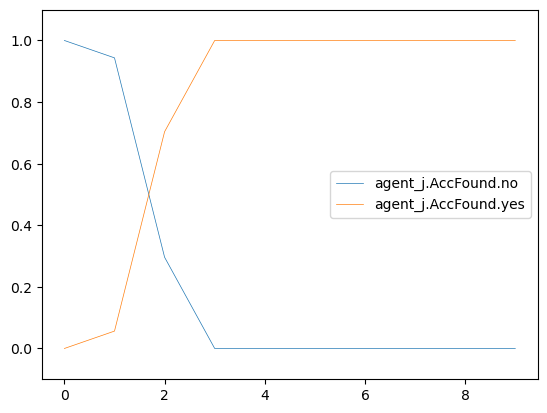

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    